# Содержание

- [Предварительная обработка данных](#1)
    - [Импорт набора данных](#11)
    - [Поиск пропусков](#12)
    - [Поиск дубликатов](#13)
    - [Приведение типов данных](#14)
    - [Определение сбалансированности](#15)
- [Исследовательский анализ данных](#2)
    - [Обзор данных](#21)
    - [Поиск выбросов](#22)
    - [Постановка задач](#23)
        - [Корреляция параметров организма и курения](#231)
        - [Обобщённый портрет курильщика](#232)
        - [Обобщённый портрет выпивающего человека](#233)
        - [Влияние алкоголя на состояние организма](#234)
- [Создание и обучение модели](#3)
    - [Подготовка данных для обучения](#31)
    - [Обзор и выбор моделей для обучения](#32)
    - [Обучение моделей](#33)
        - [Метод к-ближайших соседей](#331)
        - [Метод опорных векторов](#332)
        - [Логистическая регрессия](#333)
        - [Деревья решений](#334)
        - [Ансамблевые модели](#335)
        - [Нейронные сети](#336)
    - [Сравнение моделей](#34)

# Предварительная обработка данных <a id="1"></a>

Основной целью данной части является осмотр данных с целью:
* Создания его описания;
* Поиска и устранения пропусков в данных;
* Приведение столбцов к истинным форматам данных;
* Поиск и устранение явных и неявных дубликатов данных;
* Поиск и устранение выбросов в данных, если таковые присутствуют;
* Определить, являются ли классы, сформированные целевой переменной, сбалансированными.

## Импорт набора данных <a id="11"></a>

В начале выполнения всей работы импортируем все необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Перед началом осмотра данных их необходимо как-то извлечь из CSV-файла (Comma-Separated Values). Для этого существует библиотека **Pandas** для языка Python, которая предоставляет широкий спектр инструментов для аналитики данных. <br>
Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм *(так называется сущность для хранения данных в Pandas)* из CSV-файла:

In [2]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

Далее, чтобы убедиться в том, что данные были импортированы успешно, попробуем вывести первые 5 строк из датафрейма. Для этого в Pandas существует команда `.head()`.

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


Исходя из полученной после выполнения команды таблицы, можно сделать вывод о том, что импорт данных проведён успешно и можно приступать к дальнейшим этапам.

## Поиск пропусков <a id="12"></a>

Далее, перейдём уже непосредственно к предварительной обработки данных. И на первом этапе изучим набор данных на наличие пропусков среди данных.

При поиске пустых данных зачастую применяют специальный метод `.isna()`, который покажет, присутствуют ли пустые значения в каждом из столбцов.

Однако проблема использования данного метода заключается в том, что он просматривает всю таблицу и если где-то отсутствует хоть одно значение, то он выведет *True*, иначе *False*. Если же необходимо посчитать количество пропущенных значений, то вместе с исходным методом применяют `.sum()`.

Таким образом, итоговая команда выглядит как показано ниже:

In [4]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

Исходя из полученного результата, можно сделать вывод о том, что в исходном наборе данных **отсутствуют пустые значения**.

## Поиск дубликатов <a id="13"></a>

Следующим этапом при обработке данных идет поиск дубликатов. Обычно он делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Рассмотрим **первый случай**.

Для поиска явных дубликатов применяется метод `.duplicated()`, который ищет все дубликаты среди строк. По умолчанию данный метод признаёт дубликатами те строки, которые полностью повторяют уже встречавшиеся в наборе данных. Т.е. метод, как и в случае с методом `.isna()`, возвращает значение либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случае, функцию `.sum()`. 

In [5]:
df.duplicated().sum()

26

Как можно заметить, результат выполнения комбинации данных функций показал наличие 26 полностью повторяющихся строк. Для того, чтобы оценить, насколько сильно данные 26 строк влияют на общую картину данных, выведем общую длину набора данных при помощи встроенной функции `len()`.

In [6]:
print(f"Общий объем данных: {len(df)}")
print(f"Процент продублированных данных: {df.duplicated().sum() / len(df):.5f}")

Общий объем данных: 991346
Процент продублированных данных: 0.00003


Как можно заметить, процентное отношение дубликатов к общему объему данных невелико, и по идеи можно и опустить факт наличия дубликатов в данных. Однако, для чистоты эксперимента от дубликатов необходимо избавиться. Для этого в **Pandas** реализован метод `.drop_duplicates()`, который в качестве результата своего выполнения возвращает датафрейм без дубликатов.

Также, поскольку после удаления продублированных строк их индексы также будут удалены, то необходимо использовать метод `.reset_index()`, который проиндексирует все строки заново.

Таким образом, для того, чтобы убедится в том, что продублированные строки удалены из общего объема данных, выполним следующий набор команд.

In [7]:
print(f"Количество дубликатов до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

Количество дубликатов до удаления: 26
Количество дубликатов после удаления: 0


Далее, рассмотрим способ поиска **неявных дубликатов**. Неявными дубликатами являются разного рода ошибки в столбцах с данными (грамматические ошибки, опечатки и т.д.). Для поиска таких дубликатов применяется метод `.unique()` для каждого столбца датафрейма. Также, чтобы дубликаты было проще найти, применяют сортировку при помощи метода `.sort()`.

В итоге, применим данные методы и оценим набор данных на наличие неявных дубликатов.


In [8]:
for col in df:
    print(col, end="\n")
    vals = df[col].unique()
    vals.sort()
    print(vals, "\n")

sex
['Female' 'Male'] 

age
[20 25 30 35 40 45 50 55 60 65 70 75 80 85] 

height
[130 135 140 145 150 155 160 165 170 175 180 185 190] 

weight
[ 25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100 105 110
 115 120 125 130 135 140] 

waistline
[  8.   27.   30.   32.   35.   40.   42.   43.   48.   49.   50.   50.3
  50.5  51.   51.1  51.2  51.5  51.6  51.8  52.   52.1  52.4  52.5  52.6
  53.   53.1  53.2  53.4  53.5  53.6  53.8  54.   54.1  54.2  54.3  54.4
  54.5  54.6  54.8  54.9  55.   55.1  55.2  55.3  55.4  55.5  55.6  55.7
  55.8  55.9  56.   56.1  56.2  56.3  56.4  56.5  56.6  56.7  56.8  56.9
  57.   57.1  57.2  57.3  57.4  57.5  57.6  57.7  57.8  57.9  58.   58.1
  58.2  58.3  58.4  58.5  58.6  58.7  58.8  58.9  59.   59.1  59.2  59.3
  59.4  59.5  59.6  59.7  59.8  59.9  60.   60.1  60.2  60.3  60.4  60.5
  60.6  60.7  60.8  60.9  61.   61.1  61.2  61.3  61.4  61.5  61.6  61.7
  61.8  61.9  62.   62.1  62.2  62.3  62.4  62.5  62.6  62.7  62.8  62.9
  63.   63.1  6

Проанализировав полученные результаты можно сделать вывод о том, что неявных дубликатов в исходном наборе данных не наблюдается.

## Приведение типов данных <a id="14"></a>

В процессе поиска неявных дубликатов было замечено, что многие столбцы исходного набора данных имеют неверный тип данных. В связи с этим, повторно выведем основную информацию о датафрейме при помощи метода `.info()`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  float64
 8   hear_right        991320 non-null  float64
 9   SBP               991320 non-null  float64
 10  DBP               991320 non-null  float64
 11  BLDS              991320 non-null  float64
 12  tot_chole         991320 non-null  float64
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        991320 

После сравнения типов столбцов с их значениями было получено:
* Столбец `hear_left` преобразовать в `int`;
* Столбец `hear_right` преобразовать в `int`;
* Столбец `SBP` преобразовать в `int`;
* Столбец `DBP` преобразовать в `int`;
* Столбец `BLDS` преобразовать в `int`;
* Столбец `DBP` преобразовать в `int`;
* Столбец `tot_chole` преобразовать в `int`;
* Столбец `HDL_chole` преобразовать в `int`;
* Столбец `LDL_chole` преобразовать в `int`;
* Столбец `triglyceride` преобразовать в `int`;
* Столбец `urine_protein` преобразовать в `int`;
* Столбец `SGOT_AST` преобразовать в `int`;
* Столбец `SGOT_ALT` преобразовать в `int`;
* Столбец `gamma_GTP` преобразовать в `int`;
* Столбец `SMK_stat_type_cd` преобразовать в `int`.

Для того, чтобы преобразовать столбец к другому типу данных в **Pandas** реализован специальный метод `.astype()`, который преобразует любой объект, созданный библиотекой Pandas, к требуемому типу данных.

Таким образом, для того, чтобы преобразовать все обнаруженные столбцы, необходимо выполнить следующие строки кода:

In [10]:
cols = [
    "hear_left",
    "hear_right",
    "SBP",
    "DBP",
    "BLDS",
    "DBP",
    "tot_chole",
    "HDL_chole",
    "LDL_chole",
    "triglyceride",
    "urine_protein",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP",
    "SMK_stat_type_cd",
]
for col in cols:
    df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int32  
 8   hear_right        991320 non-null  int32  
 9   SBP               991320 non-null  int32  
 10  DBP               991320 non-null  int32  
 11  BLDS              991320 non-null  int32  
 12  tot_chole         991320 non-null  int32  
 13  HDL_chole         991320 non-null  int32  
 14  LDL_chole         991320 non-null  int32  
 15  triglyceride      991320 non-null  int32  
 16  hemoglobin        991320 

Помимо этого, на этапе поиска неявных дубликатов было обнаружено, что столбцы `sex` и `DRK_YN` являются биномиальными параметрами, т.е. существует всего лишь 2 возможных значения в данных столбцах: male/female и Y/N соответственно.

В связи с этим было принято решения изменить данные из этих двух столбцов, заменив их на 1 и 0. Пусть в столбце `sex` будет произведена следующая замена: `male -> 0, female -> 1`, а в столбце `DRK_YN` следующая: `Y -> 1, N -> 0`.

Для того, чтобы произвести данную замену в **Pandas** реализован метод `replace()`, который заменяет выбранное на то, которое требуется. Таким образом, произведём замену данных в выбранных столбцах.

In [11]:
df["DRK_YN"] = df["DRK_YN"].replace("N", 0).replace("Y", 1)
df["sex"] = df["sex"].replace("Male", 0).replace("Female", 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  int64  
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int32  
 8   hear_right        991320 non-null  int32  
 9   SBP               991320 non-null  int32  
 10  DBP               991320 non-null  int32  
 11  BLDS              991320 non-null  int32  
 12  tot_chole         991320 non-null  int32  
 13  HDL_chole         991320 non-null  int32  
 14  LDL_chole         991320 non-null  int32  
 15  triglyceride      991320 non-null  int32  
 16  hemoglobin        991320 

Таким образом, после выполнения преобразования столбцов исходного датафрейма, используются всего лишь два типа данных: **int** и **float**

## Определение сбалансированности <a id="15"></a>

В задаче классификации данные называются **несбалансированными** (imbalanced data), если в обучающей выборке доли объектов разных классов существенно различаются, также говорят, что "*классы не сбалансированы*"

Для того, чтобы выяснить, являются ли данные сбалансированными, посчитаем количество людей, относящихся к первому и второму классу, а также выведем их процентное соотношение ко всем данным.

In [12]:
dont_drink = len(df[df["DRK_YN"] == 0])
drink = len(df[df["DRK_YN"] == 1])
print(
    f"""
Количество непьющих: {dont_drink}, их процент от общего числа: {dont_drink/len(df):.4f} 
Количество пьющих: {drink}, их процент от общего числа: {drink/len(df):.4f}"""
)


Количество непьющих: 495844, их процент от общего числа: 0.5002 
Количество пьющих: 495476, их процент от общего числа: 0.4998


Как видно из полученных значений, данные являются отлично сбалансированными. Следовательно, можно завершать этап предварительной обработки данных и переходить в следующему этапу.

# Исследовательский анализ данных <a id="2"></a>

**Исследовательский анализ данных** (англ. *exploratory data analysis, EDA*) - анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

К основным целям исследовательского анализа данных обычно относят следующие:
1) Понимание структуры и характеристик набора данных;
2) Выявление аномалий и выбросов;
3) Идентификация связей и корреляций между переменными;
4) Подготовка данных для дальнейших этапов анализа.

## Обзор данных <a id="21"></a>

Теперь необходимо получить базовое представление о том, с какими данными будет производится работа. Для этого необходимо посмотреть, какие данные хранятся в каждом из столбцов исходного набора данных.

Для начала проведём оценочный анализ данных при помощи метода `.info()`. Данная функция возвращает названия столбцов, типы данных, количество ненулевых объектов в каждом столбце.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  int64  
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int32  
 8   hear_right        991320 non-null  int32  
 9   SBP               991320 non-null  int32  
 10  DBP               991320 non-null  int32  
 11  BLDS              991320 non-null  int32  
 12  tot_chole         991320 non-null  int32  
 13  HDL_chole         991320 non-null  int32  
 14  LDL_chole         991320 non-null  int32  
 15  triglyceride      991320 non-null  int32  
 16  hemoglobin        991320 

Исходя из выводимой информации, можно сделать вывод о том, что в исходном наборе данных используются 3 типа данных: **текстовые поля**, **целые числа**, **дробные числа**.

Также, в выходном сообщении показано, что в датафрейме **отсутствуют** нулевые значения в каждом из столбцов. Однако это нужно будет перепроверить при более подробном осмотре данных.

Далее, исходя из названий столбцов, можно заметить следующее:
* `sex` - биномиальный параметр, определяет пол пациента (мужской/женский);
* `age` - возраст пациента, округлённый до 5 лет (10, 15, ...);
* `height` - рост пациента, округлённый до 5 см (150, 155, ...);
* `weight` - вес пациента, округлённый до 5 кг (40, 45, ...);
* `waistline` - обхват талии пациента в см.;
* `sight_left` - зрение пациента на левый глаз (0.1 - 2.5);
* `sight_right` - зрение пациента на правый глаз (0.1 - 2.5);
* `hear_left`- биномиальный параметр, определяющий слух пациента на левое ухо (1 - нормальный, 2 - ненормальный);
* `hear_right`- биномиальный параметр, определяющих слух пациента на правое ухо (1 - нормальный, 2 - ненормальный);
* `SBP`- систолическое артериальное давление - максимальное давление в артериях в момент, когда сердце сжимается и выталкивает кровь в артерии. Нормальный уровень САД взрослого человека около 120 мм. рт. ст.;
* `DBP`- диастолические артериальное давление - нижняя граница при измерении артериального давления. Оно определяется, когда сердце расслабляется и наполняется кровью. Нормальный уровень у взрослого человека около 80 мм. рт. ст.;
* `BLDS`- уровень глюкозы в крови натощак. Нормальное значение у здорового взрослого человека примерно 70-99 мг/дл;
* `tot_chole`- общий уровень холестерина в крови пациента в мг/дл.;
* `HDL_chole`- уровень холестерина липопротеидов высокой плотности в мг/дл.;
* `LDL_chole`- уровень холестерина липопротеидов низкой плотности в мг/дл.;
* `triglyceride`- уровень триглицерина в крови в мг/дл.;
* `hemoglobin`- уровень гемоглобина в крови в г/дл.;
* `urine_protein`- количество белка в моче (1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4));
* `serum_creatinine`- уровень креатинина сыворотки в крови в мг/дл.;
* `SGOT_AST`- уровень АСТ в крови в ед./л.;
* `SGOT_ALT`- уровень АЛТ в крови в ед./л.;
* `gamma_GTP`- уровень гамма-ГТ в крови в ед./л.;
* `SMK_stat_type_cd`- отношение пациента к курению (1-никогда не курил, 2 – раньше курил, но бросил, 3 – продолжаю курить);
* `DRK_YN`- биномиальный параметр, отражающий отношение пациента к алкоголю (пьющий/непьющий).

Таким образом, можно сделать вывод о том, что данный набор данных был собран и опубликован в рамках некоторого медицинского исследования.

## Поиск выбросов <a id="22"></a>

После преобразования всех типов данных, необходимо оценить исходные данные на наличие выбросов. **Выбросами** в данных являются те значения, которые сильно отличаются от большинства других значений в наборе данных. Если в исходном наборе данных присутствуют выбросы, то от них лучше избавиться, поскольку они могут вносить существенные изменения в результаты анализа, а в дальнейшем и на обучение моделей.

Существует множество методов обнаружения, но в самым простым из них является **экстремальный анализ данных** (англ. *extreme value analysis*). При таком анализе не применяются какие-либо специальные статистические методы. Алгоритм использования таков:
1) Визуализировать данные, используя диаграммы и гистограммы для нахождения экстремальных значений;
2) Задействовать распределение, например Гауссовское, и найти значения, чье стандартное отклонение отличается в 2-3 раза от математического ожидания;
3) Отфильтровать предполагаемые выбросы из обучающей выборки и оценить работу модели.

В соответствии с первым шагом предложенного алгоритма визуализируем данные всех интересующих столбцов. Обычно, для этого импортируют библиотеку **Seaborn** и используют метод `.pairplot()`. По умолчанию эта функция создаст сетку осей таким образом, что данные из каждого числового столбца исходного датафрейма будут распределены как по оси X, так и по оси Y. Диагональные графики же показывают гистограммы распределений данных из численных столбцов

Однако, поскольку исходный датафрейм состоит из 25 столбцов, то создание такой диаграммы может занять очень продолжительное время. Поэтому, было принято решение построить для начала графики только тех столбцов, в которых могут быть выбросы. В качестве функции для построение графика была выбрана `.boxplot()`, которая рисует диаграмму 'ящик с усами', который отлично показывает наличие или отсутствие выбросов.

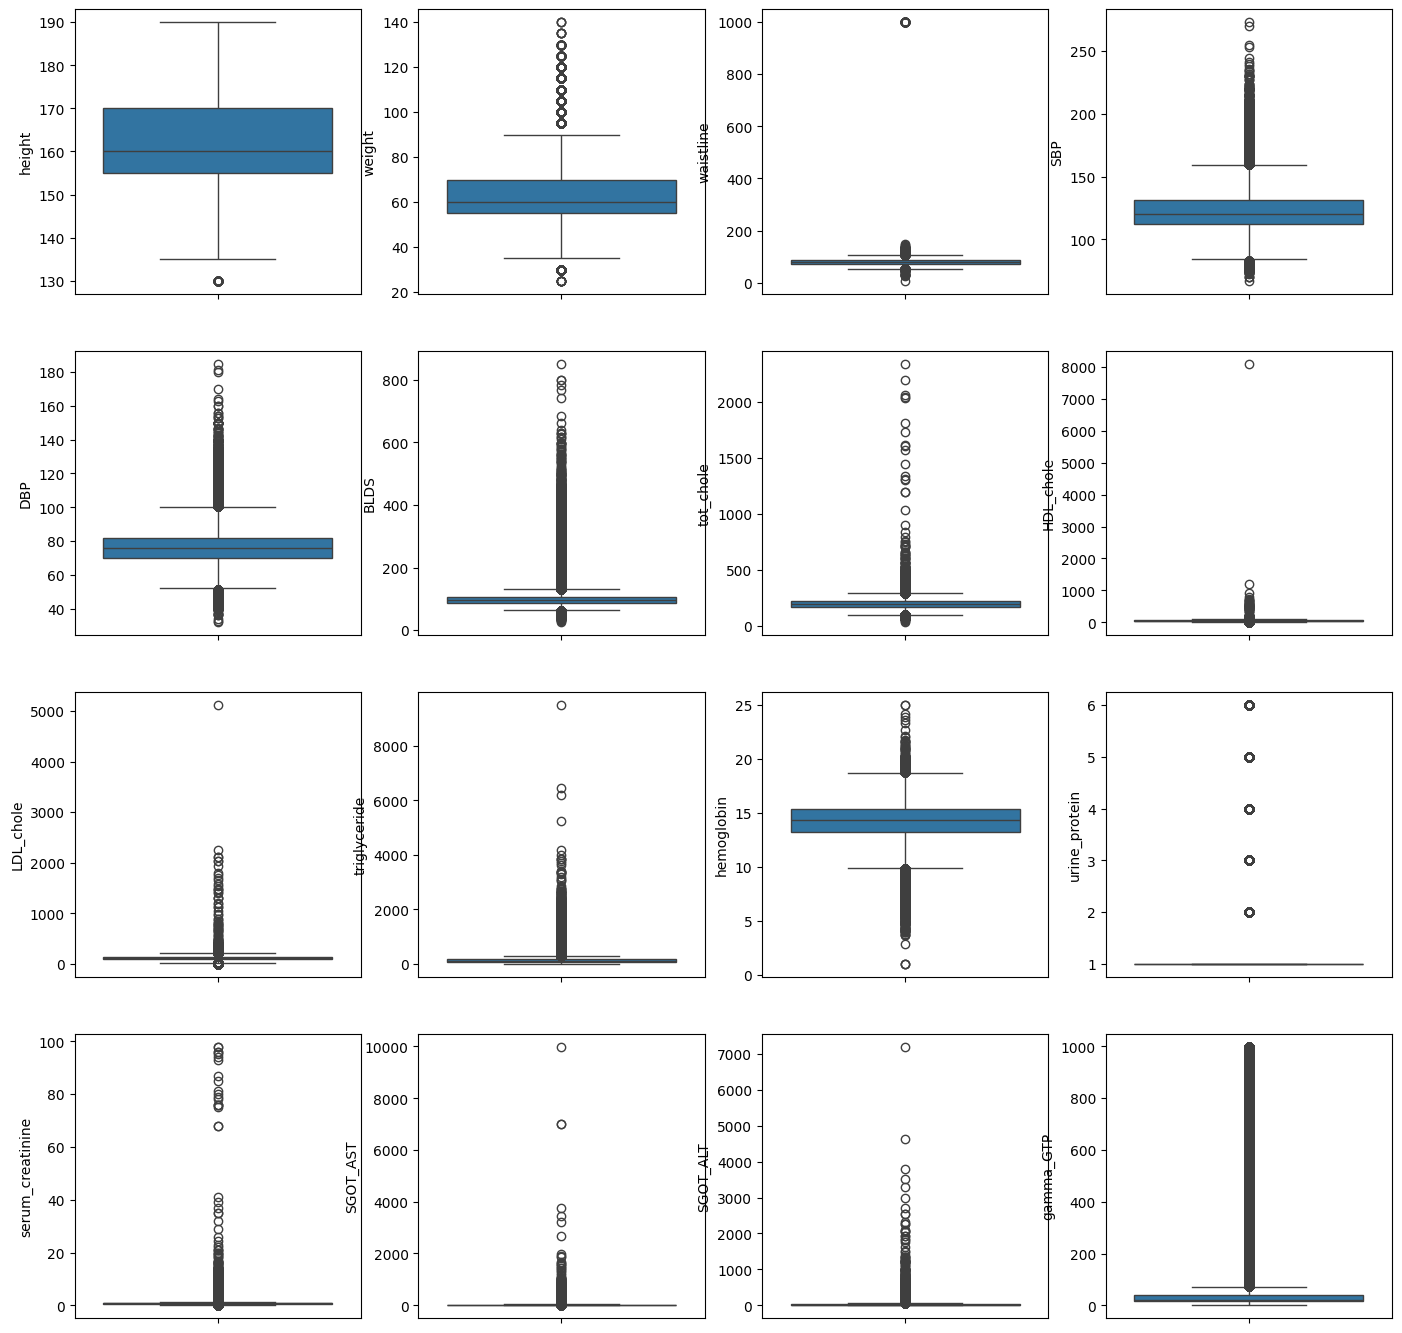

In [14]:
columns = [
    "height",
    "weight",
    "waistline",
    "SBP",
    "DBP",
    "BLDS",
    "tot_chole",
    "HDL_chole",
    "LDL_chole",
    "triglyceride",
    "hemoglobin",
    "urine_protein",
    "serum_creatinine",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP",
]
rows, cols = 4, 4
plt.figure(figsize=(17, 17))
for i in range(len(columns)):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(df[columns[i]])

Исходя из полученных графиков можно заметить, что не все столбцы имеют выбросы. Также, можно создать список столбцов, которые необходимо рассмотреть отдельно:
* Waistline
* HDL_chole
* LDL_chole
* triglyceride
* SGOT_AST
* SGOT_ALT


Начнём с рассмотрения первого из них.


### Waistline

Выведем 'ящик с усами' для первого столбца из списка. Для этого также воспользуемся методом `.boxplot()`

<Axes: ylabel='waistline'>

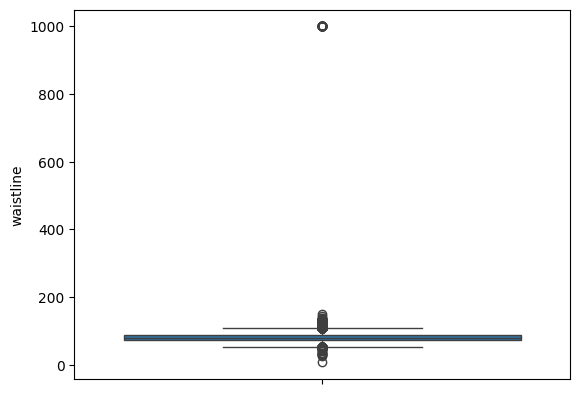

In [15]:
sns.boxplot(df["waistline"])

Как видно из полученного рисунка, среди данных присутствует явный выброс. Попробуем найти строку с такими данными среди исходного датафрейма.

In [16]:
df[df["waistline"] > 500].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
11230,1,30,160,55,999.0,1.0,1.0,1,1,100,...,91,180,12.6,1,0.8,12,8,11,1,0
23779,1,25,160,60,999.0,0.9,0.9,1,1,118,...,160,234,14.1,3,1.1,22,10,14,1,0
30711,1,25,160,55,999.0,0.8,1.0,1,1,102,...,99,80,11.1,1,0.6,14,12,10,1,0
59546,1,25,160,65,999.0,1.5,1.5,1,1,106,...,90,306,11.2,1,0.6,14,14,10,1,0
67877,1,30,155,60,999.0,1.0,1.5,1,1,114,...,146,280,10.4,1,0.8,15,6,10,1,0


Как видно, таких данных получилось аж 57 значений. Теперь нужно решить, как избавиться от данной проблемы. Поскольку удалить 57 строк было бы невежественно, то изменим данные значения на среднее арифметическое значение данного столбца, исключив при этом данные 57 строк.

Для нахождения среднего значения столбца воспользуемся методом `.mean` из библиотеки **NumPy**.

In [17]:
df.loc[df["waistline"] > 500, "waistline"] = np.mean(
    df.loc[(df["waistline"] < 500)]["waistline"].to_numpy()
)

Далее, проверим ещё раз данные из этого столбца, чтобы оценить наличие выбросов в данных.

<Axes: ylabel='waistline'>

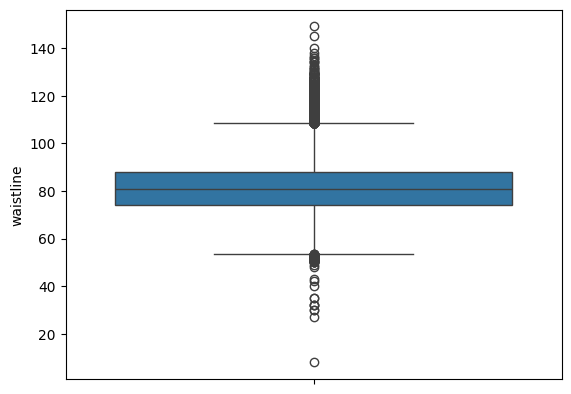

In [18]:
sns.boxplot(df["waistline"])

Видно, что теперь выброс происходит в другую сторону, а именно в меньшую сторону. Посмотрим, сколько таких данных всего:

In [19]:
df[df["waistline"] < 20].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
796004,1,75,140,40,8.0,0.1,0.4,1,1,120,...,85,256,11.0,1,0.8,59,67,60,1,0


Была обнаружена всего лишь одна строка, следовательно, можно без угрызения совести отфильтровать данные таким образом, чтобы данное значение не попало в отфильтрованный датафрейм. Фильтрация происходит благодаря функции `.loc()`, которая предоставляет доступ к группе строк и столбцов по меткам или логическому выражению. Также, выведем диаграмму еще раз, чтобы посмотреть наличие выбросов в данных. 

<Axes: ylabel='waistline'>

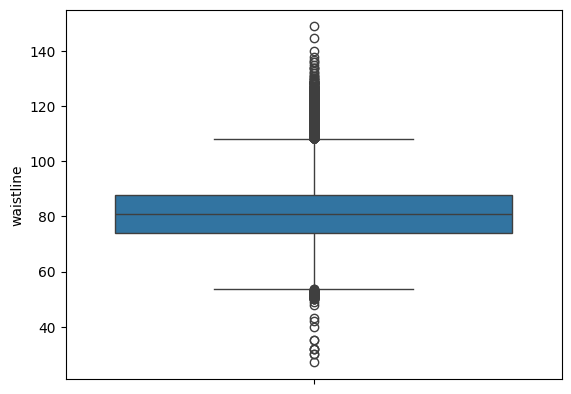

In [20]:
df = df.loc[df["waistline"] > 20]
sns.boxplot(df["waistline"])

### HDL_chole

Также, как и в предыдущий раз, для начала выведем диаграмму 'ящик с усами' при помощи метода `.boxplot()`, который поможет оценить наличие выбросов в данных.

<Axes: ylabel='HDL_chole'>

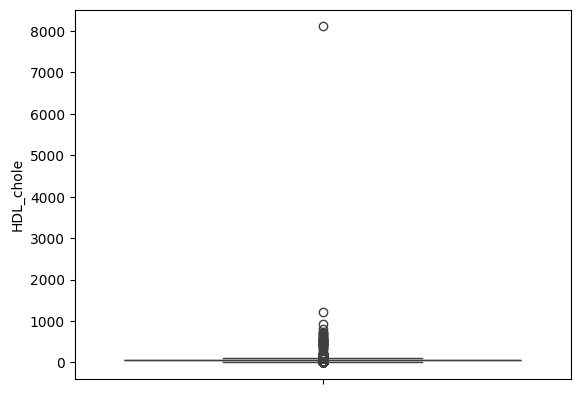

In [21]:
sns.boxplot(df["HDL_chole"])

Из приведённого выше графика наглядно видно, что присутствует выброс в данных. Попробуем выяснить количество данных с таким выбросом.

In [22]:
df[df["HDL_chole"] > 2000].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
7075,1,20,160,55,67.0,0.3,0.5,1,1,105,...,5119,9490,14.0,1,0.8,21,15,18,1,0


Была обнаружена всего лишь одна строка, значит, мы можем спокойно от неё избавится, отфильтровав исходный датафрейм.

In [23]:
df = df.loc[df["HDL_chole"] < 2000]

### LDL_chole

Для данного столбца, как и в предыдущих двух случаях, выведем диаграмму и посмотрим на наличие выбросов.

<Axes: ylabel='LDL_chole'>

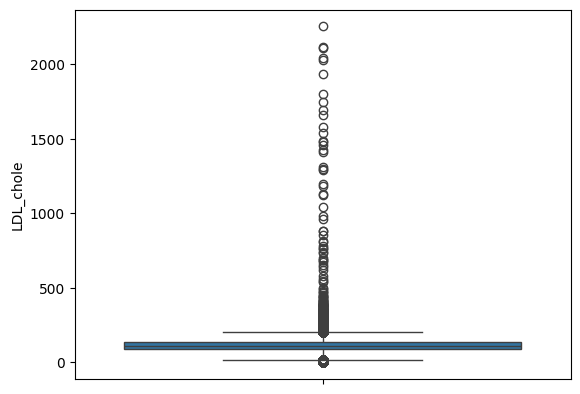

In [24]:
sns.boxplot(df["LDL_chole"])

При сравнении данного графика с тем, который был представлен изначально, можно заметить, что выброс, который был в данном столбце, ушел при устранении выбросов в других столбцах. Значит, можно переходит к следующему столбцу.

### Triglyceride

Посмотрим на 'ящик с усами' для данного столбца.

<Axes: ylabel='triglyceride'>

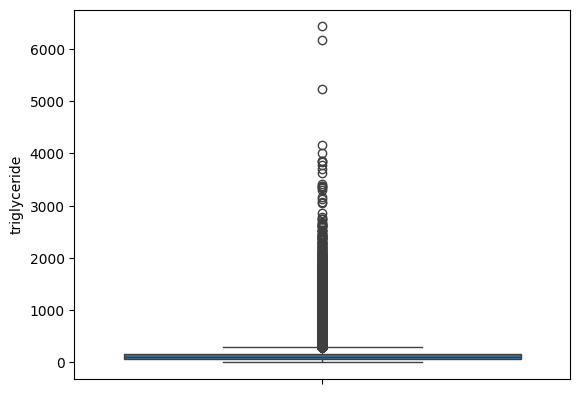

In [25]:
sns.boxplot(df["triglyceride"])

Из полученной диаграммы видно, что в данных содержатся выбросы. Попробуем оценить количество строк с выбросом.

In [26]:
df[df["triglyceride"] > 5000].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
81001,1,40,155,75,88.5,0.6,0.7,1,1,136,...,70,5236,17.3,3,0.6,28,18,28,3,1
105334,0,55,165,55,79.0,0.6,0.6,1,1,150,...,39,6430,16.3,1,0.5,19,16,477,3,1
220459,0,40,165,90,103.0,1.2,1.5,1,1,118,...,54,6173,19.3,1,0.6,26,43,169,3,0


Всего таких строк имеется 3 штуки. Следовательно, удалим данные строки из исходного набора данных.

In [27]:
df = df.loc[df["triglyceride"] < 5000]

### SGOT_AST и SGOT_ALT

Также, как и в предыдущие разы, посмотрим на диаграмму, полученную после выполнения метода `.boxplot()` для обоих столбцов.

<Axes: ylabel='SGOT_ALT'>

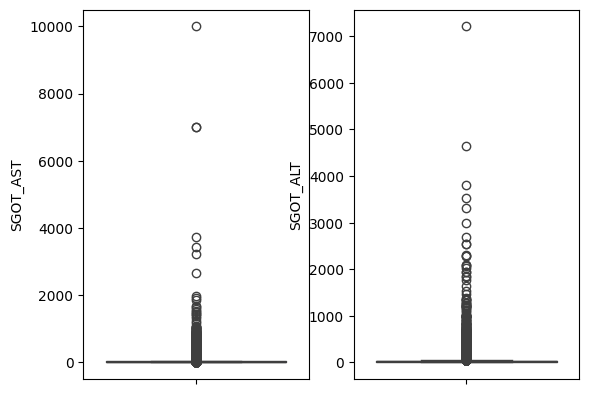

In [28]:
plt.subplot(1, 2, 1)
sns.boxplot(df["SGOT_AST"])
plt.subplot(1, 2, 2)
sns.boxplot(df["SGOT_ALT"])

Явно видны по 2 точки в данных, которые являются выбросами. Оценим количество таких строк.

In [29]:
df[(df["SGOT_AST"] > 6000) | (df["SGOT_ALT"] > 4000)]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
536962,0,50,170,45,66.0,0.9,0.7,1,1,96,...,69,67,15.4,1,1.2,9999,380,419,3,1
609072,1,40,170,70,76.0,1.0,1.0,1,1,123,...,71,159,15.5,1,0.9,1052,7210,270,1,1
642779,0,40,175,75,82.0,1.0,1.2,1,1,160,...,62,362,15.7,4,1.3,7000,3307,280,2,1
804428,0,55,170,70,90.0,1.0,1.0,1,1,100,...,52,120,15.9,4,2.2,7000,3807,429,1,0
808591,0,65,165,65,81.0,0.6,0.7,1,1,135,...,112,113,13.3,1,1.0,43,4633,9,3,1


Видно, что таких строк всего лишь 5 штук. Поскольку их слишком мало, то удалим их.

In [30]:
df = df[(df["SGOT_AST"] < 6000)]
df = df[(df["SGOT_ALT"] < 4000)]

<Axes: ylabel='SGOT_ALT'>

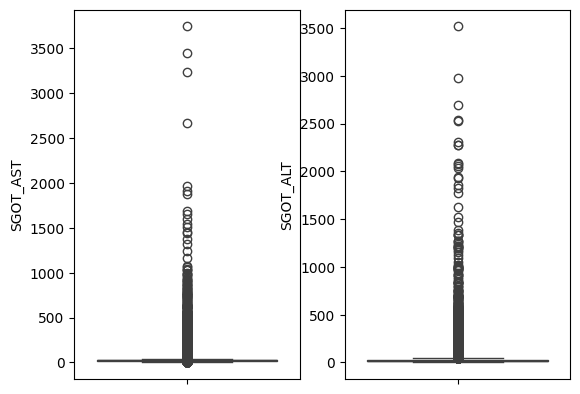

In [31]:
plt.subplot(1, 2, 1)
sns.boxplot(df["SGOT_AST"])
plt.subplot(1, 2, 2)
sns.boxplot(df["SGOT_ALT"])

## Постановка задач <a id="23"></a>

Основная задача звучит следующим образом: *определение, употребляет ли алкоголь конкретный пациент*. Данная задача обоснована тем, что при сборе анамнеза пациент может умышленно лгать лечащему врачу, в связи с этим назначенное лечение может неэффективным. 

Также, помимо основной задачи было выявлено еще ряд дополнительных подзадач, которые позволят более детально изучить данные:
1) Как изменяются параметры организма человека в зависимости от того, курит он или нет?
2) Каков обобщённый портрет курильщика?
3) Каков обобщённый портрет выпивающего человека?
4) На какие параметры организма алкоголь влияет сильнее всего?
5) Влияет ли наличие вредных привычек на возникновение сердечных/почечных проблем?

Рассмотрим данные подзадачи по отдельности

### Корреляция параметров организма и курения <a id="231"></a>

Для того, чтобы получить ответ на первую подзадачу, необходимо сравнить между собой две категории людей: некурящих и курящих. Такое разделение можно создать при помощи атрибута `SMK_stat_type_cd`. Также, существует и третья категория - бросивших курить - однако с ней возникает проблема - как обрабатывать таких людей. Поэтому было принято решение исключить данную категорию людей из рассмотрения.

В начале разобьём исходный датафрейм на два (соответствующие требуемым категориям).

In [32]:
smoking = df[df["SMK_stat_type_cd"] == 3]
not_smoking = df[df["SMK_stat_type_cd"] == 1]

Для начала оценим количество людей в каждой из категории.

In [33]:
print(
    f"""Количество курящих людей в наборе: {len(df[df["SMK_stat_type_cd"] == 3])}
Количество некурящих людей в наборе: {len(df[df["SMK_stat_type_cd"] == 1])}"""
)

Количество курящих людей в наборе: 213940
Количество некурящих людей в наборе: 602427


Как видно из полученных значений, некурящих людей практически в 3 раза больше, чем курящих. Это может говорит о несбалансированность классов, однако данное исследование не является основной задачей, в следствии чего данный недочёт можно опустить.

Рассмотрим параметры, связанные с давлением, а именно систолическое (**SBP**) и диастолические (**DBP**) артериальное давление.

<Axes: xlabel='SBP', ylabel='DBP'>

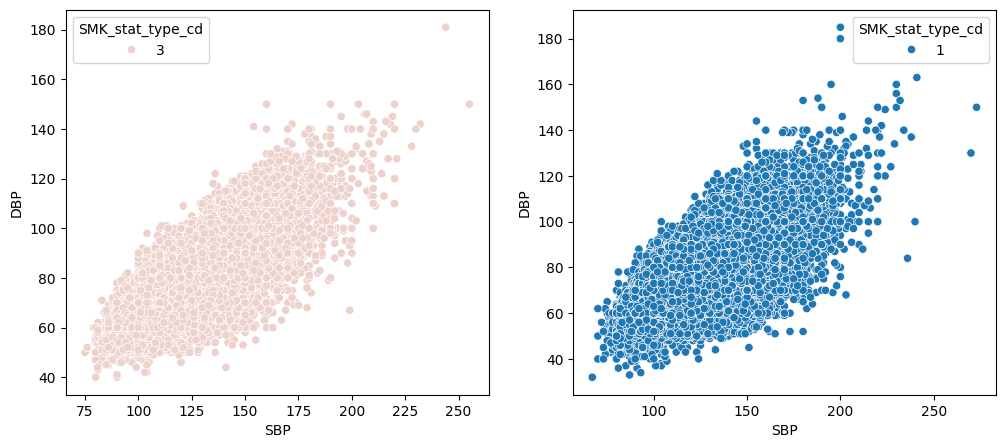

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=smoking, x="SBP", y="DBP", hue="SMK_stat_type_cd")
plt.subplot(1, 2, 2)
sns.scatterplot(data=not_smoking, x="SBP", y="DBP", hue="SMK_stat_type_cd")

Исходя из полученных диаграмм, можно сделать вывод о том, что если разница между ними и присутствует, то незначительная и её можно списать как погрешность. Для более точного сравнения двух параметров между группами, выведем среднее значение каждого из параметров и оценим разницу между средними

In [35]:
ratio_SBP = smoking["SBP"].mean() / not_smoking["SBP"].mean()
ratio_DBP = smoking["DBP"].mean() / not_smoking["DBP"].mean()
print(f"Среднее значение SBP для курящих: {smoking['SBP'].mean():.2f}")
print(f"Среднее значение SBP для некурящих: {not_smoking['SBP'].mean():.2f}")
print(f"Отношение курящие/некурящие: {ratio_SBP:.2f}")
print(f"Среднее значение SBP для курящих: {smoking['DBP'].mean():.2f}")
print(f"Среднее значение SBP для некурящих: {not_smoking['DBP'].mean():.2f}")
print(f"Отношение курящие/некурящие: {ratio_DBP:.2f}")

Среднее значение SBP для курящих: 123.58
Среднее значение SBP для некурящих: 121.18
Отношение курящие/некурящие: 1.02
Среднее значение SBP для курящих: 77.61
Среднее значение SBP для некурящих: 74.92
Отношение курящие/некурящие: 1.04


Таким образом, из полученных статистических результатов видно, то **не существует** никакой взаимосвязи между давлением и отношением человека к курению.

Далее, рассмотрим параметры, связанные с уровнем холестерина в крови у пациента. К данным параметрам относятся: общий уровень, уровень липопротеидов высокой и низкой плотности. Сперва выведем диаграмму, показывающую общий уровень холестерина в крови.

<Axes: xlabel='tot_chole', ylabel='Count'>

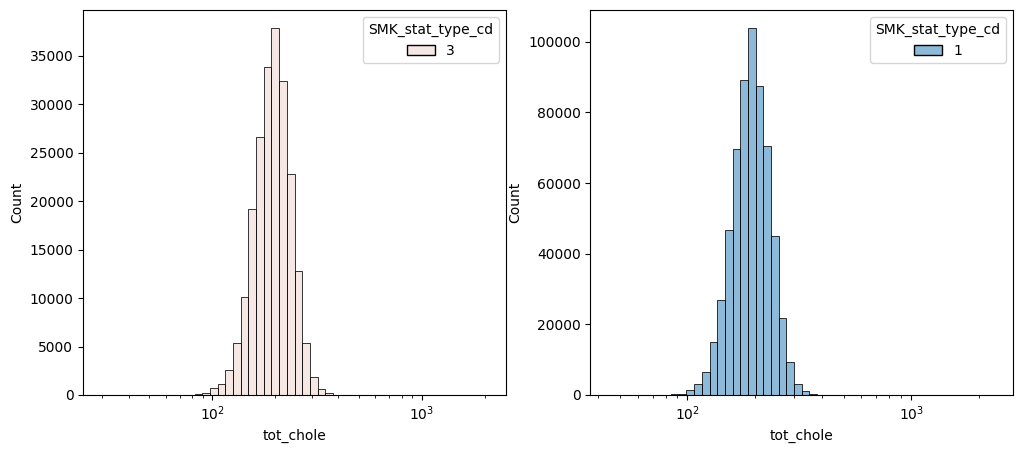

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(
    data=smoking,
    x="tot_chole",
    bins=50,
    log_scale=True,
    hue="SMK_stat_type_cd",
)
plt.subplot(1, 2, 2)
sns.histplot(
    data=not_smoking,
    x="tot_chole",
    bins=50,
    log_scale=True,
    hue="SMK_stat_type_cd",
)

Как видно из полученных гистограмм, никаких значительных отличий в уровне холестерина не было обнаружено. Продолжим построение диаграмм и выведем точечную диаграмму, отражающую данные об уровне липопротеидов высокой (**HDL**) и низкой (**LDL**) плотности

<Axes: xlabel='HDL_chole', ylabel='LDL_chole'>

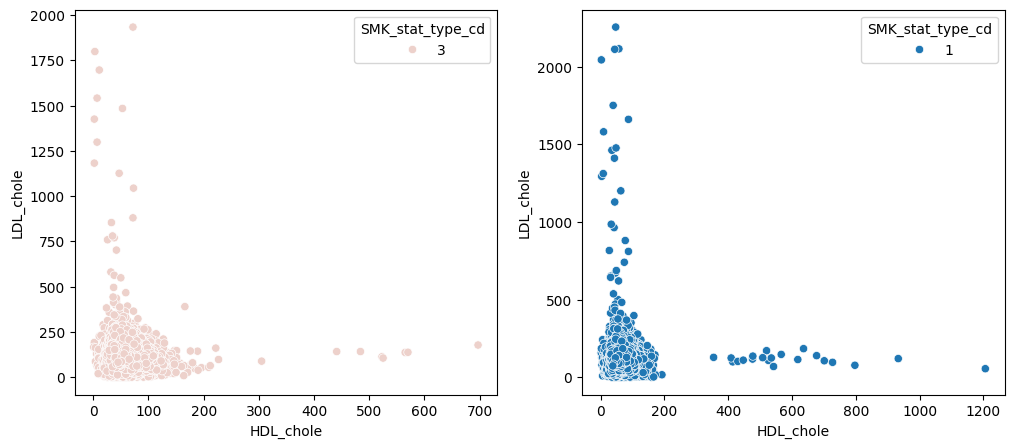

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=smoking, x="HDL_chole", y="LDL_chole", hue="SMK_stat_type_cd")
plt.subplot(1, 2, 2)
sns.scatterplot(data=not_smoking, x="HDL_chole", y="LDL_chole", hue="SMK_stat_type_cd")

Из полученных диаграмм видно, что серьезных отличий между группами не наблюдается.

Далее, точно таким же образом рассмотрим уровни триглицерина (**triglyceride**) и гемоглобина (**hemoglobin**) по категориям:

<Axes: xlabel='hemoglobin', ylabel='Count'>

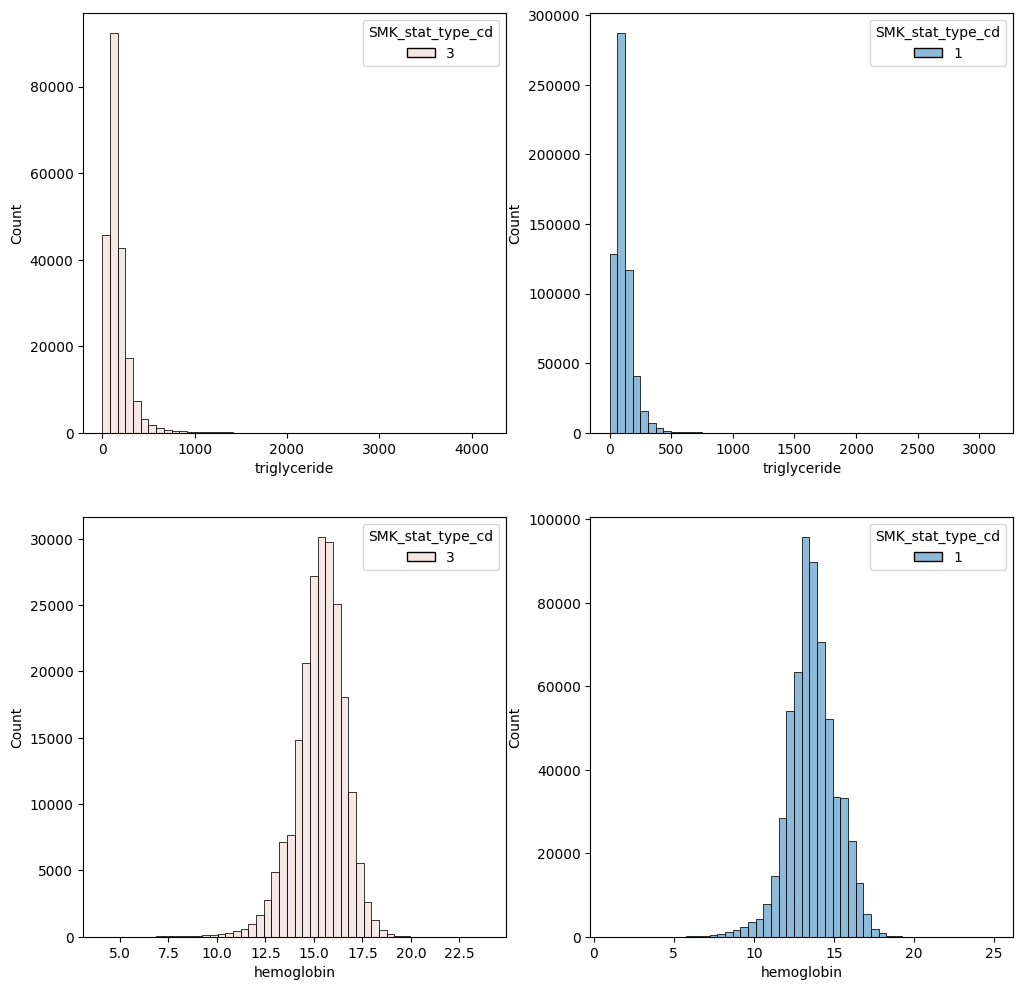

In [38]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.histplot(
    data=smoking,
    x="triglyceride",
    bins=50,
    hue="SMK_stat_type_cd",
)
plt.subplot(2, 2, 2)
sns.histplot(
    data=not_smoking,
    x="triglyceride",
    bins=50,
    hue="SMK_stat_type_cd",
)
plt.subplot(2, 2, 3)
sns.histplot(
    data=smoking,
    x="hemoglobin",
    bins=50,
    hue="SMK_stat_type_cd",
)
plt.subplot(2, 2, 4)
sns.histplot(
    data=not_smoking,
    x="hemoglobin",
    bins=50,
    hue="SMK_stat_type_cd",
)

Как видно из полученных диаграмм, никаких значительных отличий в уровнях данных анализов **не было обнаружено**. В связи с этим, перейдем к рассмотрению заключительных двух параметров, а именно уровню АСТ и АЛТ в крови.

<Axes: xlabel='SGOT_AST', ylabel='SGOT_ALT'>

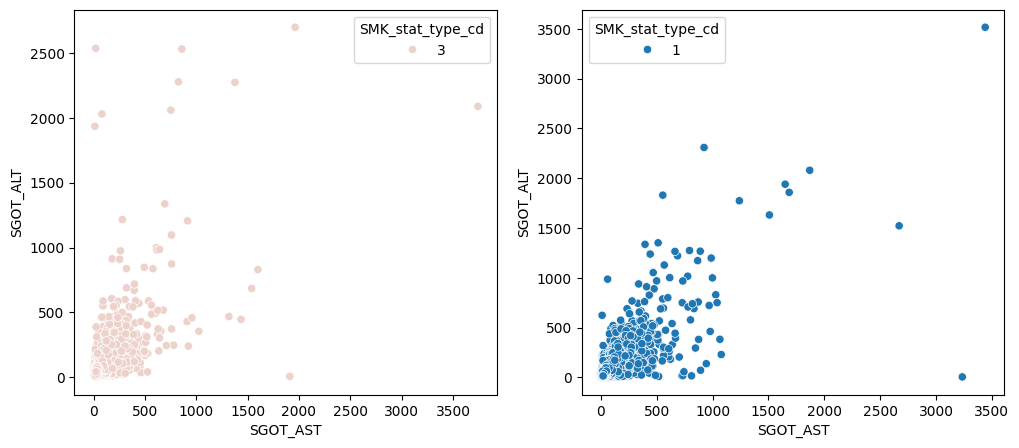

In [39]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=smoking, x="SGOT_AST", y="SGOT_ALT", hue="SMK_stat_type_cd")
plt.subplot(1, 2, 2)
sns.scatterplot(data=not_smoking, x="SGOT_AST", y="SGOT_ALT", hue="SMK_stat_type_cd")

Как видно из полученных результатов, никаких значительных отличий в данных двух параметрах **не было обнаружено**.

Таким образом, подводя итог к проделанной работе в данной части, можно сделать вывод о том, что факт курения человека ни коим образом не влияет на собранные в ходе данного эксперимента параметры организма. Следовательно, атрибут `SMK_stat_type_cd` не является целевой переменной, значит его можно использовать в качестве дополнительного параметра.

### Обобщённый портрет курильщика <a id="232"></a>

В качестве выводов в предыдущем пункте было получено, что столбец `SMK_stat_type_cd` можно рассматривать как дополнительный параметр. Однако, для того, чтобы утверждать, что данный столбец действительно требуется, необходимо выявить зависимость между данным параметром и целевой переменной.

Для этого, построим обобщённый портрет курильщика на основе предоставленных данных. Поскольку в ходе выполнения предыдущего этапа был создан датафрейм `smoking`, который содержит данные только курящих людей, то будем строить графики на основе данного набора.

Для начала стоит выяснить, как распределены курильщики между полами. Иначе говоря, выяснить, кого больше: курящих женщин или мужчин?

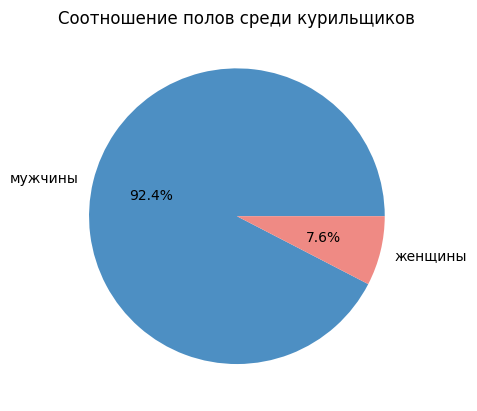

In [40]:
peoples = [len(smoking[smoking["sex"] == 0]), len(smoking[smoking["sex"] == 1])]
labels = ["мужчины", "женщины"]

fig, ax = plt.subplots()
ax.pie(peoples, labels=labels, autopct="%1.1f%%", colors=["#4D8FC3", "#EF8A84"])
ax.set_title("Соотношение полов среди курильщиков")
plt.show()

Как видно из полученной диаграммы, подавляющее **большинство курильщиков - мужчины**. Однако, присутствует немалый процент курящих женщин. 

Далее посмотрим, как распределены возраста курящих людей в зависимости от пола:

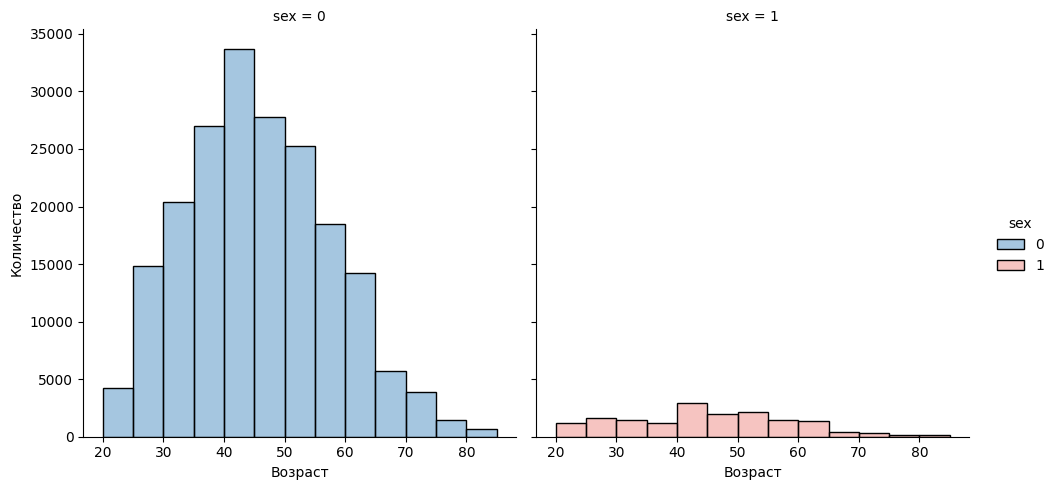

In [41]:
g = sns.displot(
    data=smoking,
    x="age",
    col="sex",
    binwidth=5,
    palette=["#4D8FC3", "#EF8A84"],
    hue="sex",
)
g.set_axis_labels(x_var="Возраст", y_var="Количество")

Как видно из полученной гистограммы, подавляющее большинство курильщиков (как мужчин, так и женщин) относятся находятся в **возрасте 40-45 лет**.

Далее посмотрим на рост и вес представителей каждого из полов и подведём итог общего портрета курящего человека.

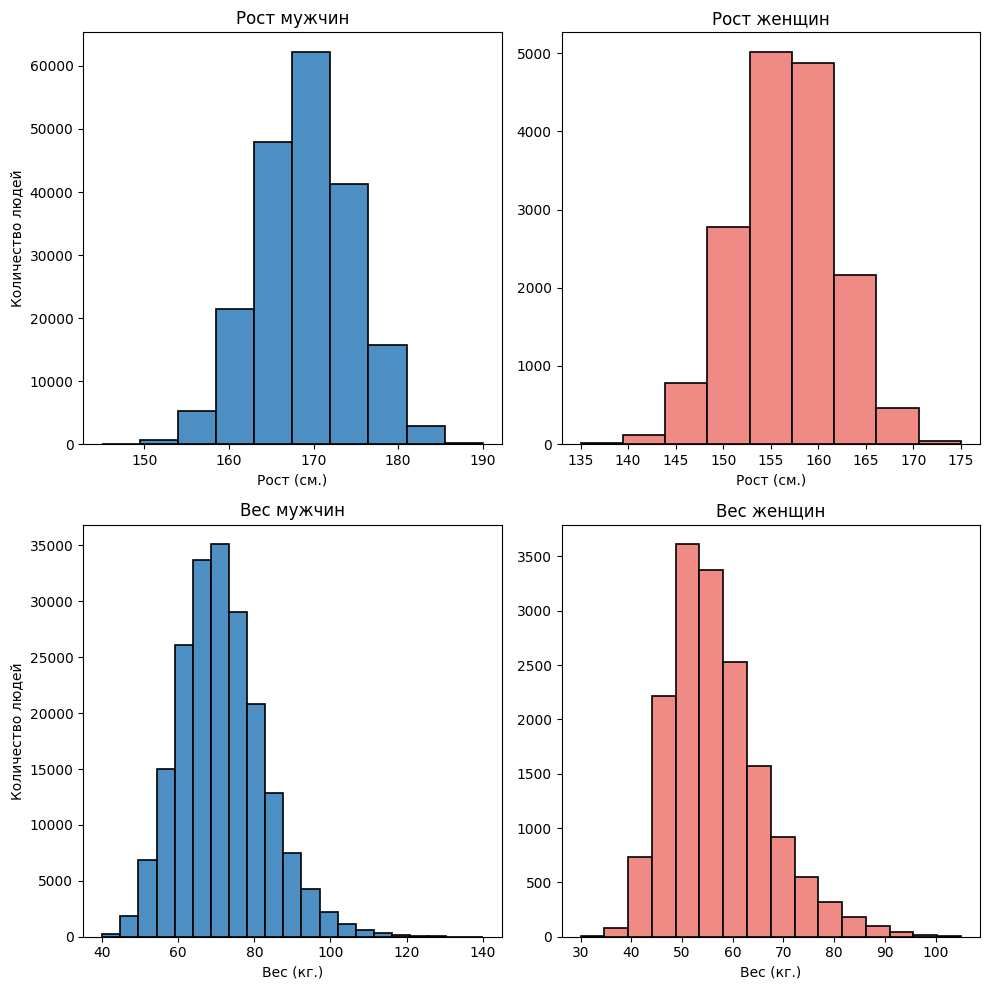

In [42]:
height_man, height_women = (
    smoking.loc[smoking["sex"] == 0]["height"],
    smoking.loc[smoking["sex"] == 1]["height"],
)
weight_man, weight_women = (
    smoking.loc[smoking["sex"] == 0]["weight"],
    smoking.loc[smoking["sex"] == 1]["weight"],
)
n_bins = 50
fig, axs = plt.subplots(2, 2, figsize=(10, 10), tight_layout=True)
axs[0, 0].hist(height_man, bins=10, color="#4D8FC3", edgecolor="black", linewidth=1.2)
axs[0, 0].set_title("Рост мужчин")
axs[0, 1].hist(height_women, bins=9, color="#EF8A84", edgecolor="black", linewidth=1.2)
axs[0, 1].set_title("Рост женщин")
axs[1, 0].hist(weight_man, bins=21, color="#4D8FC3", edgecolor="black", linewidth=1.2)
axs[1, 0].set_title("Вес мужчин")
axs[1, 1].hist(weight_women, bins=16, color="#EF8A84", edgecolor="black", linewidth=1.2)
axs[1, 1].set_title("Вес женщин")

axs[0, 0].set_ylabel("Количество людей")
axs[0, 0].set_xlabel("Рост (см.)")
axs[0, 1].set_xlabel("Рост (см.)")
axs[1, 0].set_ylabel("Количество людей")
axs[1, 0].set_xlabel("Вес (кг.)")
axs[1, 1].set_xlabel("Вес (кг.)")
plt.show()

Таким образом, обобщённый портрет курильщика немного различается в зависимости от пола человека в связи с биологическими отличиями. Получены следующие результаты:
* Мужчины (92%): возраст: 40-45 лет, рост: около 170 см., вес: около 70 кг.
* Женщины (8%): возраст: 40-45 лет, рост: 155-160 см., вес: 55-60 кг.

Но, поскольку 92% курящих людей - мужчины, то в качестве окончательного ответа на вопрос об обобщенном портрете следует дать все-таки портрет мужчины курильщика.

### Обобщённые портрет выпивающего человека <a id="233"></a>

Однако, полученное в ходе выполнения предыдущего этапа знание об обобщённом портрете курильщика, данное знание ни в какой степени не объясняет нам, для чего в исходном наборе данных присутствует этот атрибут. Поэтому, для того, чтобы привязать этот столбец к целевой переменной, необходимо создать обобщённый портрет пьющего человека.

Для начала, также, как и в предыдущий раз, разобьем исходный набор данных на 2 по целевой переменной.

In [43]:
drinkers = df[df["DRK_YN"] == 1]
not_drinkers = df[df["DRK_YN"] == 0]

Определять соотношение пьющих людей к непьющим не имеет смысла, поскольку это уже было проделано на этапе определения сбалансированности классов, поэтому приведём лишь результаты, полученные в ходе выполнения того этапа:
* Количество непьющих: 495840
* Количество пьющих: 495470

Далее выясним соотношение пьющих людей по половому признаку. Для этого также, как и в предыдущем этапе создадим круговую диаграмму, отражающую данное соотношение.

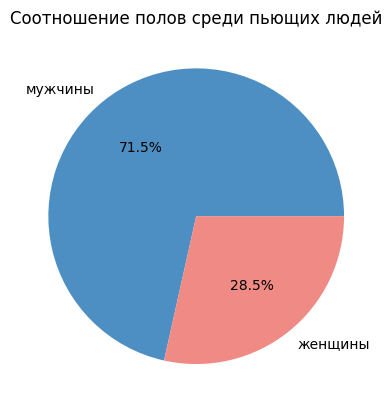

In [44]:
peoples = [len(drinkers[drinkers["sex"] == 0]), len(drinkers[drinkers["sex"] == 1])]
labels = ["мужчины", "женщины"]

fig, ax = plt.subplots()
ax.pie(peoples, labels=labels, autopct="%1.1f%%", colors=["#4D8FC3", "#EF8A84"])
ax.set_title("Соотношение полов среди пьющих людей")
plt.show()

Как видно из полученной диаграммы, ситуация значительно отличается от той, которая была ранее при создании портрета курильщика. В данном случае, более одной четвертой среди всех опрошенных людей - женщины, в то время как при опросе курильщиков - таковых было всего лишь 7,6%.

Далее, изучим распределение возрастов среди разных полов:

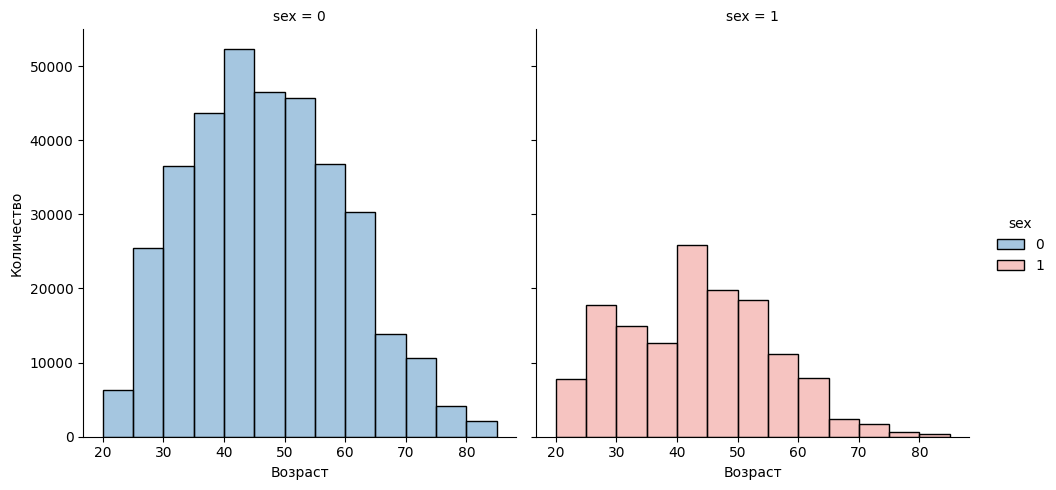

In [45]:
g = sns.displot(
    data=drinkers,
    x="age",
    col="sex",
    binwidth=5,
    palette=["#4D8FC3", "#EF8A84"],
    hue="sex",
)
g.set_axis_labels(x_var="Возраст", y_var="Количество")

Как видно из полученных гистограмм, большинство людей, употребляющих алкоголь относятся к возрастной категории **40-45 лет**. При составлении портрета курящих людей был получен тот же возрастной диапазон.

Далее изучим, как и в прошлый раз, рост и вес представителей каждого из полов. Для этого было созданы следующие диаграммы:

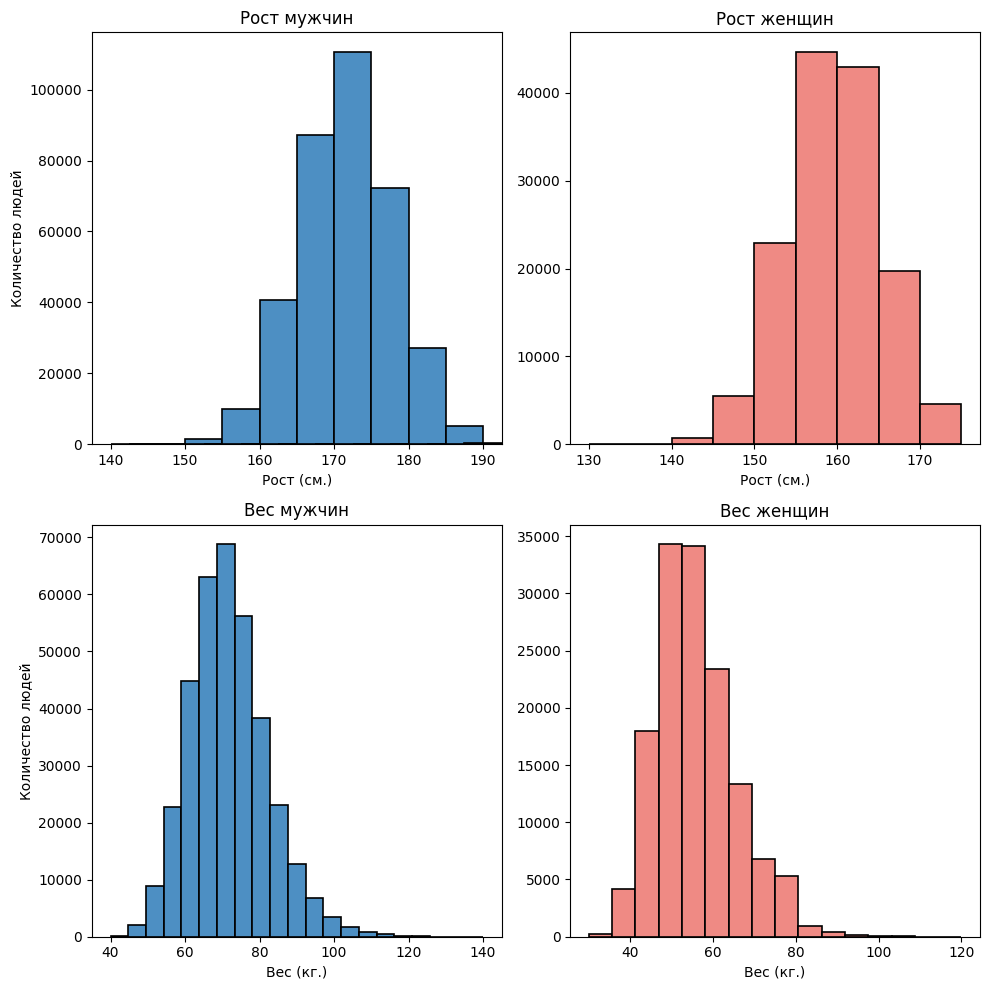

In [46]:
height_man, height_women = (
    drinkers.loc[drinkers["sex"] == 0]["height"],
    drinkers.loc[drinkers["sex"] == 1]["height"],
)
weight_man, weight_women = (
    drinkers.loc[drinkers["sex"] == 0]["weight"],
    drinkers.loc[drinkers["sex"] == 1]["weight"],
)
n_bins = 50
fig, axs = plt.subplots(2, 2, figsize=(10, 10), tight_layout=True)
axs[0, 0].hist(
    height_man, bins=20, color="#4D8FC3", edgecolor="black", linewidth=1.2, width=5
)
axs[0, 0].set_title("Рост мужчин")
axs[0, 1].hist(height_women, bins=9, color="#EF8A84", edgecolor="black", linewidth=1.2)
axs[0, 1].set_title("Рост женщин")
axs[1, 0].hist(weight_man, bins=21, color="#4D8FC3", edgecolor="black", linewidth=1.2)
axs[1, 0].set_title("Вес мужчин")
axs[1, 1].hist(weight_women, bins=16, color="#EF8A84", edgecolor="black", linewidth=1.2)
axs[1, 1].set_title("Вес женщин")

axs[0, 0].set_ylabel("Количество людей")
axs[0, 0].set_xlabel("Рост (см.)")
axs[0, 1].set_xlabel("Рост (см.)")
axs[1, 0].set_ylabel("Количество людей")
axs[1, 0].set_xlabel("Вес (кг.)")
axs[1, 1].set_xlabel("Вес (кг.)")
plt.show()

Из полученных результатов видно, то относительно данных параметров обобщённый портрет людей, употребляющих спиртные напитки никак не отличается от обобщённого портрета курящих людей.

Однако, в качестве заключительного этапа при составлении портрета пьющего человека, построим диаграмму, показывающие соотношение курящих и не курящих людей среди людей, употребляющих спиртные напитки. Помимо этого, построим такую диаграмму для непьющих людей и сравним разницу между полученными диаграммами.

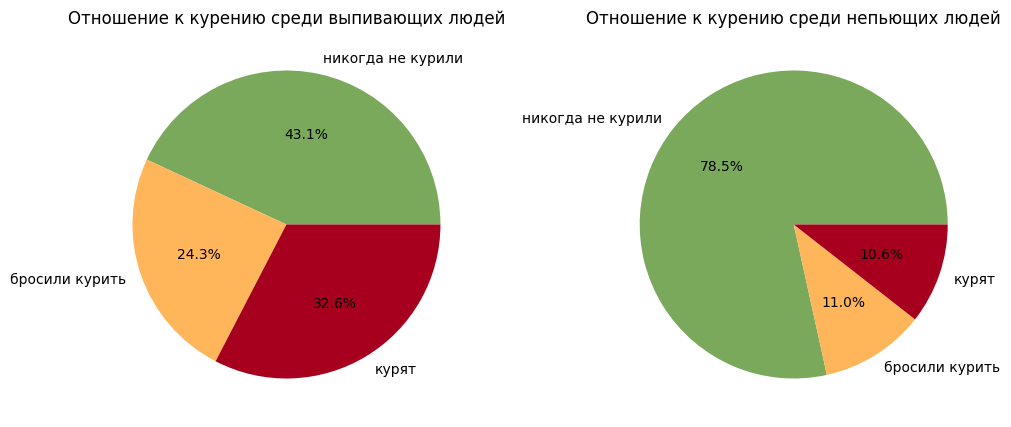

In [47]:
peoples_drinking = [
    len(drinkers[drinkers["SMK_stat_type_cd"] == 1]),
    len(drinkers[drinkers["SMK_stat_type_cd"] == 2]),
    len(drinkers[drinkers["SMK_stat_type_cd"] == 3]),
]
peoples_not_drinking = [
    len(not_drinkers[not_drinkers["SMK_stat_type_cd"] == 1]),
    len(not_drinkers[not_drinkers["SMK_stat_type_cd"] == 2]),
    len(not_drinkers[not_drinkers["SMK_stat_type_cd"] == 3]),
]
labels = ["никогда не курили", "бросили курить", "курят"]
colors = ["#7aa95c", "#ffb55a", "#a7001e"]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].pie(peoples_drinking, labels=labels, autopct="%1.1f%%", colors=colors)
ax[0].set_title("Отношение к курению среди выпивающих людей")
ax[1].pie(peoples_not_drinking, labels=labels, autopct="%1.1f%%", colors=colors)
ax[1].set_title("Отношение к курению среди непьющих людей")
plt.show()

Как видно из первой диаграммы, больше половины когда-либо курили на постоянной основе. Также, если сравнивать между собой две диаграммы, можно обратить внимание на то, что подавляющее большинство людей, которые негативно относятся к алкоголю, также негативно относятся и к курению.

Таким образом, обобщённый портрет выпивающего человека в зависимости от пола будет немного отличаться в связи с биологическими различиями:
* Мужчины (72%): возраст: 40-45 лет, рост: 170-175 см., вес: 70-75 кг.
* Женщины (28%): возраст: 40-45 лет, рост: 155-165 см., вес: 55-60 кг.


Однако, отличительной особенностью выпивающих людей является их склонность к курению, поскольку 56% опрошенных людей когда-либо курили.

Исходя из полученных результатов, можно сделать вывод о том, что столбец `SMK_stat_type_cd` все-таки имеет некоторую взаимосвязь с целевой переменной, следовательно, нельзя просто взять и выкинуть данный столбец из исходного набора данных, поскольку он является зависимым атрибутом.

### Влияние алкоголя на состояние организма <a id="234"></a>

В качестве заключительной части при выполнении исследовательского анализа данных хотелось бы выяснить, на какие столбцы сильнее всего влияет факт употребления человеком спиртных напитков. Для этого, необходимо сравнить между собой результаты анализов у двух групп: выпивающих и непьющих людей.

Сперва посмотрим, как алкоголь влияет на систолическое и диастолическое артериальные давления (столбцы `SBP` и `DBP`) соответственно.

<Axes: xlabel='SBP', ylabel='DBP'>

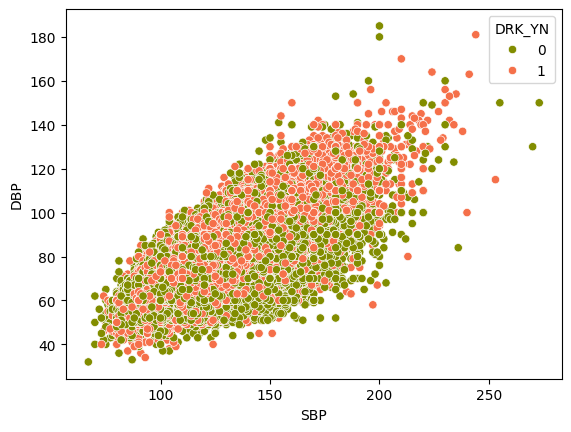

In [48]:
sns.scatterplot(data=df, x="SBP", y="DBP", hue="DRK_YN", palette=["#828D00", "#F5704A"])

Исходя из полученной точечной диаграммы не получается заметить существенную разницу между категориями.


Далее, сравним уровень глюкозы в организмах выпивающего и непьющего человека (столбец `BLDS`).

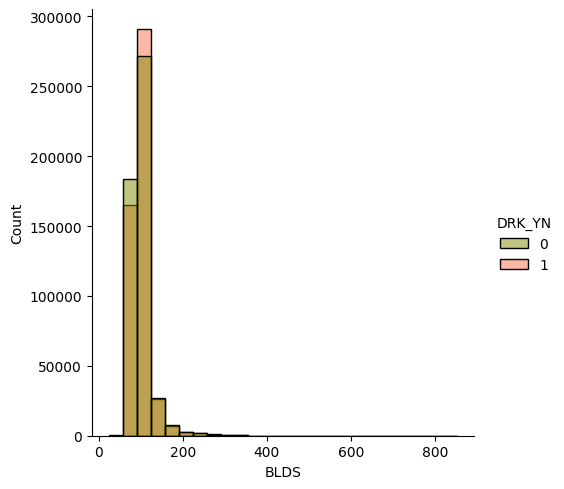

In [49]:
sns.displot(
    data=df,
    x="BLDS",
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
    bins=25,
)

Как можно заметить по полученной гистограмме, значительных отличий в результатах уровня глюкозы, также, как и в предыдущий раз, не наблюдается.

Далее, точно таким же образом рассмотрим значения уровня холестерина липопротеидов высокой и низкой плотности (`HDL_chole` и `LDL_chole`) между группами. Полученные диаграммы показаны ниже:

<Axes: xlabel='HDL_chole', ylabel='LDL_chole'>

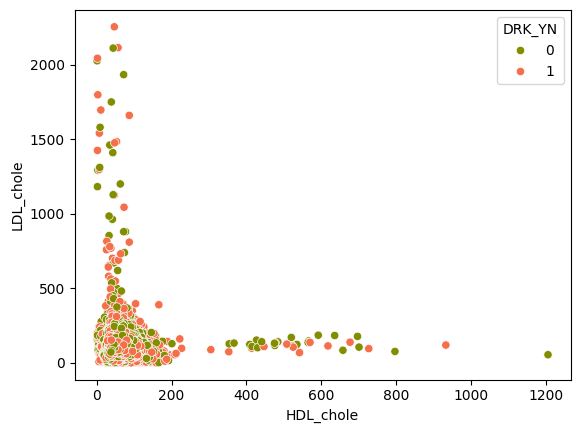

In [50]:
sns.scatterplot(
    data=df, x="HDL_chole", y="LDL_chole", hue="DRK_YN", palette=["#828D00", "#F5704A"]
)

Как видно по приведённой выше диаграмме, никаких значительных отличий не было обнаружено. Для закрепления полученного результата сравним между собой значения столбца `tot_chole` у данных групп.

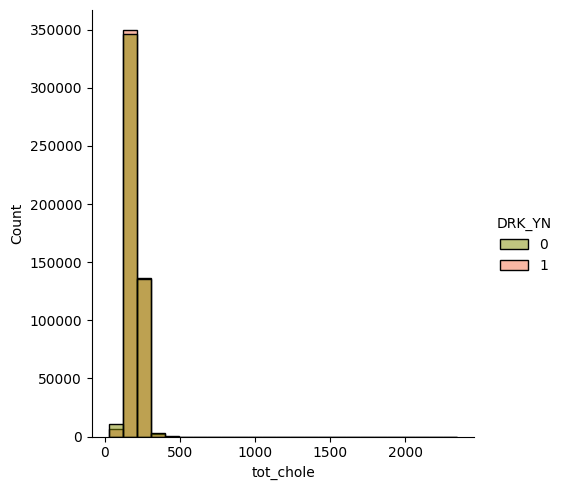

In [51]:
sns.displot(
    data=df,
    x="tot_chole",
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
    bins=25,
)

Из данной диаграммы видно, что разницы между данными классами не было обнаружено.

Рассмотрим следующие два параметра, а именно столбцы `triglyceride` и `hemoglobin` и сравним, отличаются ли значения данных параметров между приведёнными категориями респондентов.

<Axes: title={'center': 'Уровень гемоглобина'}, xlabel='hemoglobin', ylabel='Count'>

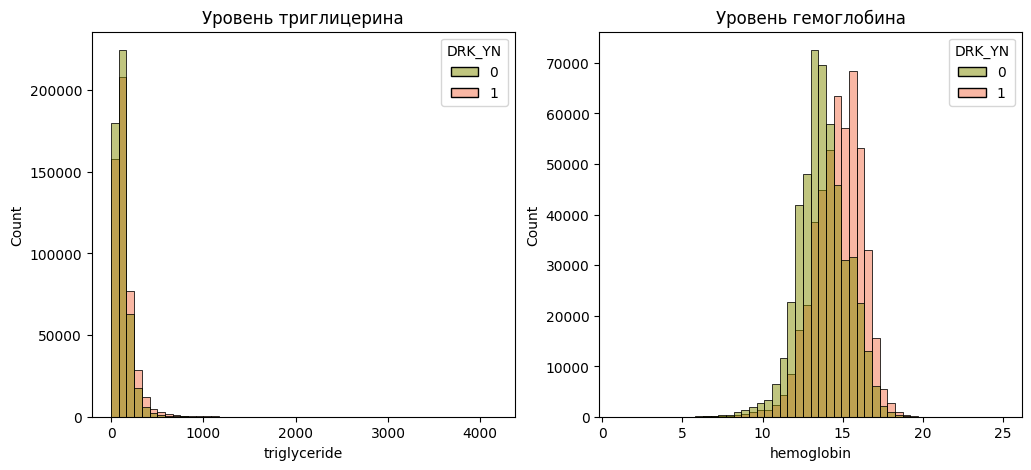

In [52]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Уровень триглицерина")
sns.histplot(
    data=df,
    x="triglyceride",
    bins=50,
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
)
plt.subplot(1, 2, 2)
plt.title("Уровень гемоглобина")
sns.histplot(
    data=df,
    x="hemoglobin",
    bins=50,
    hue="DRK_YN",
    palette=["#828D00", "#F5704A"],
)

Из приведённых выше диаграмм видно, что уровень триглицерина в крови между выпивающими и непьющими людьми не имеет никаких отличий. Однако, тоже самое нельзя сказать и про уровень гемоглобина в крови у пациентов разных групп, ведь у непьющих людей средний уровень незначительно ниже, чем у выпивающих.

Далее, сравним между собой показатель количества белка в урине респондентов разных категорий.

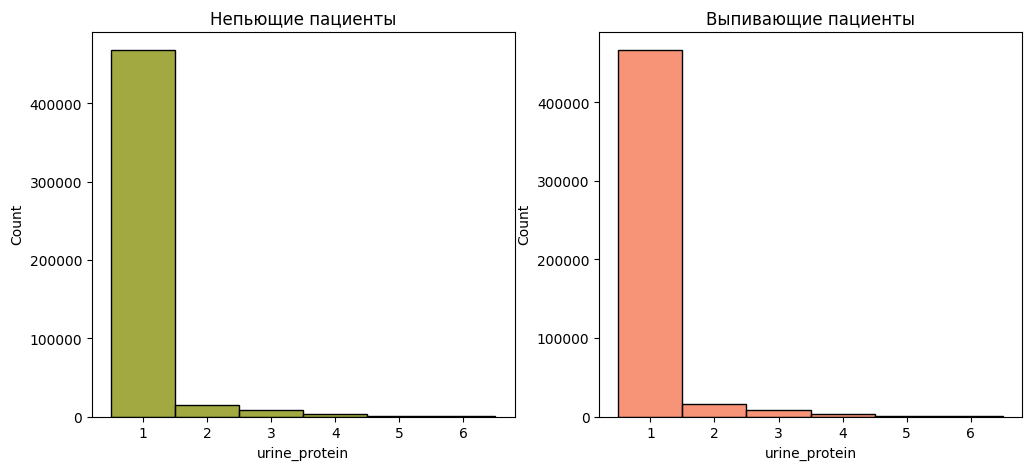

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Непьющие пациенты")
sns.histplot(
    data=not_drinkers,
    x="urine_protein",
    color="#828D00",
    discrete=True,
)
plt.subplot(1, 2, 2)
plt.title("Выпивающие пациенты")
sns.histplot(
    data=drinkers,
    x="urine_protein",
    color="#F5704A",
    discrete=True,
)
plt.show()

Исходя из полученных диаграмм, можно сделать вывод о том, что данный параметр ни коем образом не находится под влиянием того, как человек относится к употреблению горячительных напитков.

В качестве предпоследней диаграммы необходимо построить диаграмму с результатами анализа уровень на АСТ и АЛТ в крови пациентов. Созданная диаграмма показана ниже:

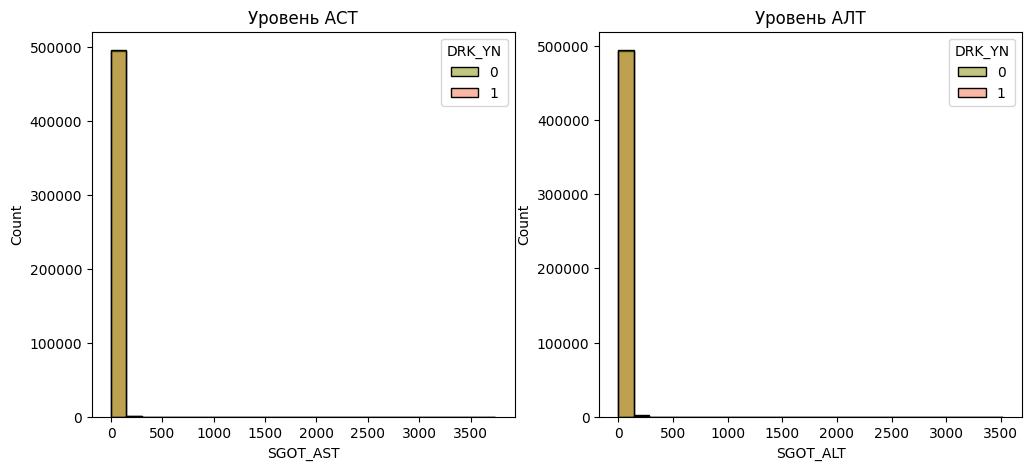

In [54]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Уровень АСТ")
sns.histplot(
    data=df, x="SGOT_AST", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.subplot(1, 2, 2)
plt.title("Уровень АЛТ")
sns.histplot(
    data=df, x="SGOT_ALT", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.show()

Из полученных графиков видно, что никаких отличий между группами в данных двух параметрах не существует.

И наконец, оценим значения уровня креатинина сыворотки и уровня гамма-ГТ в крови у пациентов с разным отношением к алкогольным напиткам.

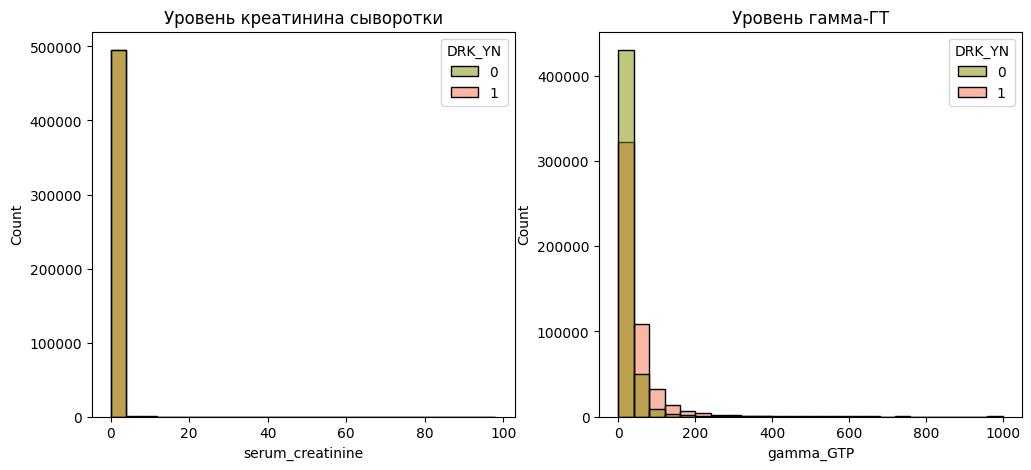

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Уровень креатинина сыворотки")
sns.histplot(
    data=df, x="serum_creatinine", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.subplot(1, 2, 2)
plt.title("Уровень гамма-ГТ")
sns.histplot(
    data=df, x="gamma_GTP", hue="DRK_YN", palette=["#828D00", "#F5704A"], bins=25
)
plt.show()

Из полученных гистограмм видно, что уровень креатинина сыворотки никак не зависит от того, употребляет ли человек спиртные напитки или нет. Однако, уровень гамма-гт имеет незначительное отличие в зависимости от отношения человеку к алкоголю. Заметно, что уровень гамма-гт чаще выше у выпивающих людей, нежели у непьющих.

Таким образом, подводя итог к проделанной работе в ходе выполнения данного этапа, можно сказать, что алкоголь может влиять на 2 параметра организма: на уровень гемоглобина (отвечающий за удержание и доставку к органам, тканям молекул кислорода) и на уровень гамма-ГТ (отвечающий за биохимические превращения в печени и желчевыводящих путях).

С медицинской точки зрения при повышении уровня гемоглобина у человека наблюдается сгущение крови. В этом случае могут возникать такие состояния, как повышение артериального давления и ухудшение кровоснабжения в клетках тканей. Это, в свою очередь, увеличивает риск возникновение тромбоза, эмболии, инфаркта миокарда и инсульта. (тут должна быть плашка лучше обратиться к специалисту)

Если же уровень гамма-глютамилтранспептидаза (гамма-ГТ) повышен, то это свидетельствует о наличии холестаза. Активация фермента происходит при циррозах печени, инфекционных гепатитах, жировом гепатозе, различных новообразованиях и патологии желчевыводящих путей. (тут должна быть плашка лучше обратиться к специалисту)

# Создание и обучение модели <a id="3"></a>

На этом шаге происходит обучение модели. Обучение моделей машинного обучения происходит итерационно - пробуются различные модели, перебираются гиперпараметры, сравниваются значения выбранной метрики и выбирается лучшая комбинация.

## Подготовка данных для обучения <a id="31"></a>

Вначале нужно определить, на каких данных будет обучаться модель, а на каких тестироваться. **Традиционный подход** - это разделение исходного набора данных на 3 части (обучение, валидация и тестирование) с пропорции 60/20/20. В данном случае обучающая выборка используется для обучения модели, а валидация и тестирование для получения значения метрики без эффекта переобучения.

Однако существует и другой подход к разбиению данных - разделение на 2 части (обучение и тестирование) по правилу 80-20 (80% тренировочный, 20% тестовый). Зачастую данный метод применяется в тех случаях, когда отсутствует достаточное количество данных как в обучающем, так и в проверочном наборе.  

Перед тем как начать разбивать данные необходимо выделить из исходного набора данных целевую переменную (столбец `DRK_YN`) и сохранить её в отдельную переменную. Ниже приведён код разделения:

In [56]:
x = df.drop(columns=["DRK_YN"], axis=1)
y = df["DRK_YN"]

В ходе выполнения данной работы будет использован подход с разделением исходной выборки на 2 части с пропорцией 80-20, поскольку данный способ является самым популярным способом разбиения данных. Для того, чтобы разбить данные таким образом, существует специальный метод `train_test_split` в библиотеке `scikit-learn`.

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Обзор и выбор моделей для обучения <a id="32"></a>

Далее нужно понять, какие модели будут использоваться. Выбор модели зависит от решаемой задачи, используемых признаков и требований по сложности. При выборе модели обязательно принять во внимание следующие факторы:
- Достаточность данных (обычно, сложные модели требуют большого количества данных);
- Обработка пропусков (некоторые модели не умеют обрабатывать пропуски);
- Формат данных (для части алгоритмов потребуется конвертация данных).

В контексте машинного обучения классификация относится к *обучению с учителем*. Такой тип подразумевает, что у машины есть некий учитель, который говорит ей как правильно. Рассказывает, что на этой картинке кошка, а на этой собака. То есть учитель уже заранее разделил (разметил) все данные на кошек и собак, а машина учится на конкретных примерах. На данный момент классификацию используют для:
- Спам-фильтры;
- Определение языка;
- Поиск похожих документов;
- Анализ тональности;
- Распознавание рукописных букв и цифр;
- Определение подозрительных транзакций.

Популярными алгоритмами для решения такого рода задач являются:
* Метод k-ближайших соседей (K-Nearest Neighbors);
* Метод опорных векторов (Support Vector Machines);
* Логистическая регрессия (Logistic Regression);
* Классификатор дерева решений (Decision Tree Classifier) / Случайный лес (Random Forest Classifier);
* Наивный байесовский метод (Naive Bayes);

В качестве моделей для решения поставленной задачи были выбраны первые 4 из вышеперечисленного списка. Также, в качестве 5-го эксперимента попробуем построить простейшую нейронную сеть для данной задачи. В качестве заключительного этапа сравним точность классификации, полученную всеми этими моделями и сделаем выводы.

## Обучение моделей <a id="33"></a>

### Метод к-ближайших соседей <a id="331"></a>

**Алгоритм KNN** (k-nearest Neighbors) - типичный пример *ленивого ученика*. Ученик называется "ленивым" не из-за своей очевидной простоты, а оттого, что он не узнаёт различающую функцию из обучающих данных, а взамен запоминает обучающий набор данных.

Сам алгоритм KNN довольно прямолинеен и может быть подытожен в виде следующих шагов:
1) Выбрать число $k$ и метрику расстояния;
2) Найти $k$ ближайших соседей образца, который нужно классифицировать;
3) Назначить метку класса по большинству голосов.



Базируясь на выбранной метрике расстояния, алгоритм KNN находит в обучающем наборе данных $k$ образцов, ближайших (или наиболее похожих) к точке, которую необходимо классифицировать. Затем метка класса для точки данных определяется на основе мажоритарного голосования среди её $k$ ближайших соседей

Главное преимущество такого основанного на памяти подхода в том, что классификатор немедленно адаптируется по мере накопления нами новых обучающих данных. Тем е менее, недостаток связан с тем, что вычислительная сложность классификации новых образцов при худшем сценарии растёт линейно с увеличением количества образцов в обучающем наборе данных. Кроме того, мы не можем отбрасывать обучающие образцы ввиду отсутствия шага *обучения*. Таким образом, при работе с крупными наборами данных проблемой может стать пространство хранения.

*Правильный* выбор $k$ критически важен для нахождения хорошего баланса между переобучением и недообучением. Также необходимо обеспечить выбор метрики расстояния, подходящей для признаков в наборе данных. Для образцов с вещественными значениями часто применяется простая мера - евклидово расстояние. Однако при использовании меры в виде евклидова расстояния также важно **стандартизировать данные**, чтобы каждый признак в равной степени вносил вклад в расстояние.

Далее, перейдём к практической части работы с данной моделью, а именно создадим экземпляр данной модели, подберём наилучшую комбинацию гиперпараметров, обучим модель и оценим точность предсказаний. Практическая реализация данной модели находится в библиотеке `scikit-learn`, поэтому импортируем из неё все необходимые компоненты в проект.

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Можно заметить, что помимо классификационной модели были также импортированы и другие компоненты из данной библиотеки. Таковыми компонентами стали `StandardScaler`, `Pipeline` и `GridSearchCV`. 

Модуль `preprocessing` в **scikit-learn** предоставляет класс `StandardScaler`, который является быстрым и простым способом стандартизации набора данных. Стандартизация наборов данных является общим требованием для многих моделей машинного обучения, реализованных в **scikit-learn**. Если отдельные признаки не похожи на стандартные нормально-распределённые данные (Гауссовские с нулевым средним значением и единичной дисперсией), то модели могут работать некорректно.

Для создания составной модели преобразователи данных обычно объединяются с другими преобразователями или моделями. Преобразователи данных - это алгоритмы, которые изменяют данные, например, `StandardScaler`. Наиболее распространенным инструментом для создания составных моделей является `Pipeline` (или конвейер). Конвейер полезен, поскольку обычно существует фиксированная последовательность шагов при обработке данных, например, выбор признаков => нормализация => классификация.

Гиперпараметры - это параметры, которые непосредственно влияют на обучение модели. В **scikit-learn** они передаются в качестве аргументов конструктору класса оценщиков. И для того, чтобы не проверять вручную каждый гиперпараметр у каждой из моделей в **scikit-learn** предусмотрены два общих подхода к поиску параметров: `GridSearchCV` исчерпывающе рассматривает все комбинации параметров, в то время как `RandomizedSearchCV` может выбирать заданное количество кандидатов из пространства параметров с заданным распределением. Но, поскольку `GridSearchCV` может выполнятся достаточно долго, будем использовать более оптимизированную его версию - `HalvingGridSearchCV`.

In [62]:
import chime
%load_ext chime 

Далее создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [172]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
knn = KNeighborsClassifier(n_jobs=-1)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

Затем, определим гиперпараметры, от которых зависит классификатор и которые будут перебираться в процессе кросс-валидации:  

In [173]:
params = [
    {
        "knn__n_neighbors": np.arange(5, 15),
        "knn__metric": ["minkowski", "euclidean", "manhattan"],
    }
]

Запустим процесс кросс-валидации и выведем наилучшую комбинацию гиперпараметров для данного классификатора:

In [ ]:
%%time
%%chime
knn_classifier = HalvingGridSearchCV(
    estimator=pipe, 
    param_grid=params,
    factor=3,
    cv=5, verbose=1, 
    n_jobs=-3, 
    scoring="roc_auc").fit(
    x_train, y_train
)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 29372
max_resources_: 793048
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 30
n_resources: 29372
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 1
n_candidates: 10
n_resources: 88116
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 2
n_candidates: 4
n_resources: 264348
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 793044
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 4.39 s
Wall time: 2h 46min 57s


После завершения подбора параметров посмотрим на наилучшую их комбинацию, а также наилучшую оценку, полученную на тренировочных данных:

In [ ]:
print(
    f"Оптимальные параметры: {knn_classifier.best_params_}\nНаилучшая оценка: {knn_classifier.best_score_}"
)

Оптимальные параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14}
Наилучшая оценка: 0.7822574034640888


Оптимальные параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14}

### Метод опорных векторов <a id="332"></a>

Ещё одним мощным и широко используемым алгоритмом обучения является **метод опорных векторов** *(Support Vector Machine - SVM)*, который можно считать расширением персептрона. Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость, разделяющую объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

Зазор определяется как расстояние между разделяющей гиперплоскостью (границей решений) и ближайшими к этой гиперплоскости обучающими образцами, которые называются *опорными векторами*.

Логическое обоснование наличия границ решений с широкими зазорами заключается в том, что такие модели обычно имеют меньшую ошибку обобщения, тогда как модели с маленькими зазорами больше предрасположены к переобучению. Чтобы получить представления о доведении до максимума зазора, необходимо пристальнее взглянуть на те положительные и отрицательные гиперплоскости, которые параллельны границе решений и могут быть выражены следующим образом:
$$w_0 + w^Tx_{положительная} = 1$$
$$w_0 + w^Tx_{отрицательная} = -1$$
Если вычесть одно уравнение из другого, то получится следующее:
$$w^T(x_{положительная} - x_{отрицательная}) = 2$$
Теперь можно нормализовать это уравнение по длине вектора $w$, которая определяется как:
$$||w|| = \sqrt{\sum_{j=1}^{m}w_j^2}$$
В итоге получается следующее уравнение:
$$\frac{w^T(x_{положительная} - x_{отрицательная})}{||w||} = \frac{2}{||w||}$$

Левую часть последнего уравнения можно интерпретировать как расстояние между положительной и отрицательной гиперплоскостями (зазор), подлежащий доведению до максимума. Теперь целевой функцией SVM становится доведение до максимума зазора путем максимизации $\frac{2}{||w||}$ при условии корректной классификации образцов, что может быть записано следующим образом:
$$w_0 + w^Tx^i \geq 1, \qquad \textit{если} \ \ y^i = 1$$
$$w_0 + w^Tx^i \leq -1, \qquad \textit{если} \ \ y^i = -1$$
$$для \ \  i = 1...N$$

Два приведённых уравнения по существу говорят о том, что все образцы отрицательного класса должны находится с одной стороны отрицательной гиперплоскости, а все образцы положительного класса быть позади положительной гиперплоскости, что можно записать более компактно:
$$y^i (w_0 + w^Tx^i) \geq 1 \quad \forall i$$

Перед началом реализации данной модели необходимо импортировать все требуемые библиотеки:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import chime

Далее, также как и в предыдущий раз, создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [ ]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
svm = LinearSVC(max_iter=10000)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("svm", svm)])

Затем, определим гиперпараметры, от которых зависит классификатор и которые будут перебираться в процессе кросс-валидации:  

In [ ]:
params = [
    {
        "svm__tol": np.arange(1e-6, 1e-2, 5e-3),
    }
]

Запустим процесс кросс-валидации и выведем наилучшую комбинацию гиперпараметров для данного классификатора:

In [ ]:
%%time
%%chime
svm_classifier = HalvingGridSearchCV(
    estimator=pipe, 
    param_grid=params,
    factor=3,
    cv=5, verbose=1, 
    n_jobs=-3, 
    scoring="roc_auc",
    aggressive_elimination=True).fit(
    x_train, y_train
)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 793048
max_resources_: 793048
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 2
n_resources: 793048
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CPU times: total: 39min 22s
Wall time: 1h 38min 48s


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


После завершения подбора параметров посмотрим на наилучшую их комбинацию, а также наилучшую оценку, полученную на тренировочных данных:

In [ ]:
print(
    f"Оптимальные параметры: {svm_classifier.best_params_}\nНаилучшая оценка: {svm_classifier.best_score_}"
)

Оптимальные параметры: {'svm__tol': 0.005001}
Наилучшая оценка: 0.8009397670183167


Оптимальные параметры: {'svm__tol': 0.005001}

Из полученных данных видно, что точность на тестовых данных ненамного лучше у SVM-модели, чем у KNN.

### Логистическая регрессия <a id="333"></a>

Логистическая регрессия представляет собой классификационную модель, которая крайне проста в реализации, но очень хорошо работает на линейно сепарабельных классах. **Логистическая регрессия** - один из наиболее широко применяемых в производственной среде алгоритмов, предназначенных для классификации.

Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (т.е. прямой) на две соответствующих классам области. Под линейной границей в случае двух измерений имеется ввиду прямая линия без изгибов, в случае трёх - плоскость и т.д. Эта граница задаётся в зависимости от имеющихся исходных данных и обучающего алгоритма.

Чтобы прояснить идею, лежащую в основе логистической регрессии как вероятностной модели для двоичной классификации вводится $p$ - вероятность положительного события. Термин "положительное событие" не обязательно означает "хорошее" событие, а имеет отношение к событию, которые мы хотим спрогнозировать; можно думать о положительном событии как о метке класса $y=1$. Затем определим *логит-функцию (logit)*, которая представляет собой следующее:
$$logit(p) = ln{\frac{p}{(1-p)}}$$

Логит-функция принимает входные значения в диапазоне $[0; 1]$ и трансформирует их в значения по всему диапазону вещественных чисел, которые можно использовать для выражения линейной взаимосвязи между значениями признаков и логарифмом перевеса:
$$logit(p(y=1|x)) = w_0x_0 + w_1x_1 + ... + w_nx_n = \sum_{i=0}^n {w_ix_i} = w^Tx$$
Здесь $p(y=1|x)$ - условная вероятность того, что специфический экземпляр принадлежит классу 1 при заданных признаках $x$.

Фактически, в данной модели интересует прогнозирование вероятности того, что определённый образец принадлежит к конкретному классу, а это является обратной формой логит-функции. Она также называется логистической сигмоидальной функцией, а иногда просто сигмоидальной функцией из-за своей характерной S-образной формы:
$$\phi(z) = \frac{1}{1 + e^{-z}}$$
Здесь $z$ - общий вход, т.е. линейная комбинация весов и входов:
$$z = w^Tx = w_0x_0 + w_1x_1 + ... + w_nx_n$$

Далее нарисуем график сигмоидальной функции, чтобы посмотреть, как он выглядит:

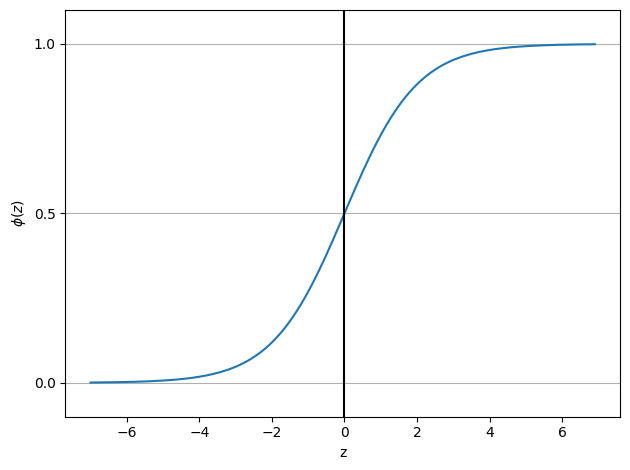

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z) $")
# отметки и линия координатой сетки оси у
plt.yticks([0.0, 0.5, 1.0])
ах = plt.gca()
ах.yaxis.grid(True)
plt.tight_layout()
plt.show()

Можно заметить, что функция $\phi(z)$ приближается к 1, если $z$ стремиться к бесконечности ($z \rightarrow \infty$), т.к. $e^{-z}$ становится очень малым для больших значений $z$. Подобным же образом $\phi(z)$ стремится к 0 для $z \rightarrow -\infty$ как результат все больше и больше увеличивающегося знаменателя. Подводя итоги, данная сигмоидальная функция принимает на входе вещественные числа и трансформирует их в значения из диапазона $[0; 1]$ с точкой пересечения $\phi(z) = 0.5$

Выход сигмоидальной функции интерпретируется как вероятность того, что определённый образец принадлежит классу 1, $\phi(z) = P(y = 1 |x;w)$ при заданных признаках $x$, параметризованных весами $w$.

Как и в предыдущий раз, перед созданием классификатора, необходимо для начала импортировать все необходимые модули из библиотек:

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import chime

Далее, также как и в предыдущий раз, создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [175]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
lr = LogisticRegression(solver="saga", n_jobs=-1)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("lr", lr)])

Затем, определим гиперпараметры, от которых зависит классификатор и которые будут перебираться в процессе кросс-валидации:  

In [177]:
params = {
    "lr__penalty": ["l1", "l2", "elasticnet"],
    "lr__C": np.linspace(0.1, 5, 100),
    "lr__l1_ratio": np.linspace(0, 1, 20),
}

Запустим процесс кросс-валидации и выведем наилучшую комбинацию гиперпараметров для данного классификатора:

In [178]:
%%time
%%chime
lr_classifier = HalvingGridSearchCV(
    estimator=pipe, 
    param_grid=params,
    factor=3,
    cv=5, verbose=1, 
    n_jobs=-3, 
    scoring="roc_auc",
    aggressive_elimination=True,).fit(
    x_train, y_train
)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 362
max_resources_: 793048
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 6000
n_resources: 362
Fitting 5 folds for each of 6000 candidates, totalling 30000 fits
----------
iter: 1
n_candidates: 2000
n_resources: 1086
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
----------
iter: 2
n_candidates: 667
n_resources: 3258
Fitting 5 folds for each of 667 candidates, totalling 3335 fits
----------
iter: 3
n_candidates: 223
n_resources: 9774
Fitting 5 folds for each of 223 candidates, totalling 1115 fits
----------
iter: 4
n_candidates: 75
n_resources: 29322
Fitting 5 folds for each of 75 candidates, totalling 375 fits
----------
iter: 5
n_candidates: 25
n_resources: 87966
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 6
n_candidates: 9
n_resources: 263898
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 7
n_c

C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


CPU times: total: 2min 29s
Wall time: 11min 12s


После завершения подбора параметров посмотрим на наилучшую их комбинацию, а также наилучшую оценку, полученную на тренировочных данных:

In [179]:
print(
    f"Оптимальные параметры: {lr_classifier.best_params_}\nНаилучшая оценка: {lr_classifier.best_score_}"
)

Оптимальные параметры: {'lr__C': 0.44646464646464656, 'lr__l1_ratio': 0.15789473684210525, 'lr__penalty': 'l1'}
Наилучшая оценка: 0.8024099481025649


Оптимальные параметры: {'lr__C': 0.44646464646464656, 'lr__l1_ratio': 0.15789473684210525, 'lr__penalty': 'l1'}

Исходя из полученных результатов видно, что данная модель по своей точности мало чем отличается от SVM. Единственное отличие лишь в скорости обучения: логистическая регрессия обучилась в 8 раз быстрее, чем модель опорных векторов.

### Деревья решений <a id="334"></a>

Классификаторы на основе **деревьев принятия решений** являются привлекательными моделями, когда необходима интерпретируемость данных. Как подсказывает само название, можно предположить, что такая модель разбивает данные, задавая последовательность вопросов. Базируясь на признаках в обучающем наборе, модель на основе дерева принятия решений обучается последовательности вопросов, чтобы выводить метки классов для образцов.

Используя алгоритм принятия решения, начинаем с корня дерева и разбиваем данные по признаку, который дает в результате наибольший *прирост информации (Information Gain)*. В рамках итерационного процесса повторяем описанную процедуру разбиения в каждом узле, пока листовые узлы не станут чистыми. Это означает, что все образцы в каждом узле принадлежат тому же самому классу.

На практике результатом может оказаться очень глубокое дерево с многочисленными узлами, что легко способно привести к переобучению. Таким образом, дерево необходимо *подрезать*, устанавливая предел для его максимальной глубины.

Для того, чтобы разделить узлы в самых информативных признаках, нам понадобится определить целевую функцию, которую необходимо оптимизировать посредством алгоритма обучения дерева. В данном случае целевая функция заключается в доведении до максимума прироста информации при каждом разделении, что определяется следующим образом:
$$IG(D_p, f) = I(D_p) - \sum_{j=1}^n \frac{N_j}{N_p}I(D_j)$$
где: $f$ - признак для выполнения разбиения; $D_p$ и $D_j$ - набор данных родительского и $j$-ого дочернего узла; $I$ - мера загрязнённости; $N_p$ - общее количество образцов в родительском узле; $N_j$ - количество образцов в $j$-ом дочернем узле.

Можно заметить, что прирост информации представляет собой просто разность между загрязнённостью родительского узла и суммой загрязнённостей дочерних узлов - чем ниже загрязнённость дочерних узлов, тем выше прирост информации.

Зачастую применяют следующие 3 меры загрязнённости (или критерии разбиения):
1. **Энтропия ($I_H$)**:
$$I_H(t) = - \sum_{i=1}^c p(i|t) \ \log_2 p(i|t)$$
В данном случае $p(i|t)$ - доля образцов, которые принадлежат классу $i$ для индивидуального узла $t$. </br>
Следовательно, энтропия равна $0$, если все образцы в узле принадлежат тому же самому классу, и максимальна при равномерном распределении классов. Таким образом, можно говорить, что критерий энтропии стремится довести до максимума полное количество информации в дереве.

2. **Критерий Джинни ($I_G$)**:

Загрязнённость Джинни можно понимать как критерий для минимизации вероятности неправильной классификации:
$$I_G(t) = \sum_{i=1}^c p(i|t)(1-p(i|t)) = 1 - \sum_{i=1}^c p(i|t)^2$$ 
Подобно энтропии критерий Джинни максимален, когда классы в полной мере перемешаны, например, в окружении с двоичным классами. Тем не менее, на практике загрязненность Джинни и энтропия выдают очень похожие результаты, и часто не стоит тратить много времени на оценку деревьев с использованием различных критериев загрязнённости вместо экспериментирования с разными параметрами отсечения при подрезке.

3. **Ошибка классификации ($I_{\Epsilon}$)**:

$$I_{\Epsilon} = 1 - max(p(i|t))$$
Ошибка классификации - полезный критерий для подрезки, но не рекомендуется для создания дерева принятия решений, т.к. она менее чувствительна к изменениям в вероятностях классов узлов.

Далее, попробуем построить несколько моделей дерева решений и найдем оптимальную через кросс-валидацию. Перед началом выполнения поставленной задачи - импортируем все необходимые модули:

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import chime

Далее, также как и в предыдущий раз, создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [59]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
tree = DecisionTreeClassifier(min_samples_leaf=10)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("tree", tree)])

Как и в предыдущие разы, определим гиперпараметры, от которых зависит классификатор и которые будут перебираться в процессе кросс-валидации:  

In [67]:
params = {
    "tree__criterion": ["gini", "entropy", "log_loss"],
    "tree__max_depth": np.arange(10, 20),
    "tree__max_features": np.arange(1, len(x_train.columns)),
    "tree__min_samples_leaf": np.arange(20, 50),
}

Запустим процесс кросс-валидации и выведем наилучшую комбинацию гиперпараметров для данного классификатора:

In [68]:
%%time
%%chime
tree_classifier = HalvingGridSearchCV(
    estimator=pipe, 
    param_grid=params,
    factor=3,
    cv=5, verbose=1, 
    n_jobs=-3, 
    scoring="roc_auc",
    aggressive_elimination=True,
    min_resources = 1000).fit(
    x_train, y_train
)

n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 7
min_resources_: 1000
max_resources_: 793048
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 19800
n_resources: 1000
Fitting 5 folds for each of 19800 candidates, totalling 99000 fits
----------
iter: 1
n_candidates: 6600
n_resources: 1000
Fitting 5 folds for each of 6600 candidates, totalling 33000 fits
----------
iter: 2
n_candidates: 2200
n_resources: 1000
Fitting 5 folds for each of 2200 candidates, totalling 11000 fits
----------
iter: 3
n_candidates: 734
n_resources: 1000
Fitting 5 folds for each of 734 candidates, totalling 3670 fits
----------
iter: 4
n_candidates: 245
n_resources: 3000
Fitting 5 folds for each of 245 candidates, totalling 1225 fits
----------
iter: 5
n_candidates: 82
n_resources: 9000
Fitting 5 folds for each of 82 candidates, totalling 410 fits
----------
iter: 6
n_candidates: 28
n_resources: 27000
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------

После завершения подбора параметров посмотрим на наилучшую их комбинацию, а также наилучшую оценку, полученную на тренировочных данных:

In [69]:
print(
    f"Оптимальные параметры: {tree_classifier.best_params_}\nНаилучшая оценка: {tree_classifier.best_score_}"
)

Оптимальные параметры: {'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__max_features': 22, 'tree__min_samples_leaf': 49}
Наилучшая оценка: 0.805336366726865


Оптимальные параметры: {'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__max_features': 22, 'tree__min_samples_leaf': 49}
Наилучшая оценка: 0.805336366726865

### Ансамблевые модели <a id="335"></a>

У каждой модели машинного обучения есть некоторый предел, до которого можно повышать точность, а дальше начинается переобучение и модель уже физически не может предсказать точнее, чем заложено в её природе. Эта природа определяется не только моделью, а связкой модели, т.е. математическим аппаратом и данными, которые эта модель пытается преобразовать. Однако точность работы одной конкретной модели не является пределом при решении задач машинного обучения.

Когда с этим столкнулись первые исследователи они обратились к математической статистике и выяснили, что если взять несколько однородных моделей и среднее их предсказание, но при этом модели обучены на немного разных выборках, то получится, что ошибка среднего равна $\sqrt{n}$, где $n$ это количество моделей. И ошибка выходит меньше за счёт того, что мы берём несколько одинаковых моделей. **Цель** ансамблевых методов - объединить различные классификаторы в метаклассификатор, который обладает лучшей эффективностью обобщения, чем каждый индивидуальный классификатор сам по себе.

В качестве примера ансамблей можно привести феномен "Мудрость толпы". В 1906 году Френсис Гальтон предлагал посетителям ярмарки угадать вес живого быка. Всего в эксперименте приняли участие около 800 человек. Каждый из участников должен был написать свой ответ на карточке и передать её Гальтону. Затем он сложил все ответы и разделил их на общее количество участников, чтобы получить среднее значение. Результат оказался удивительным: среднее значение всех ответов было ближе к истинному весу быка, чем большинство индивидуальных ответов.

Наиболее популярными видами ансамблирования являются:
1. **Бэггинг** (bagging: bootstrap aggregation) - принцип построения композиции, основанный на простом голосовании.
2. **Бустинг** - принцип построения композиции, основанный на последовательном обучении моделей, при котором модели исправляют ошибки друг у друга.
3. **Стекинг** - принцип, при котором происходит комбинация разнородных моделей для построения прогноза.

**Бэггинг** *(bootstrap aggregating)* - это метод, который позволяет уменьшить вариабельность модели, увеличивая её точность. Основная идея бэггинга заключается в том, чтобы обучить несколько одинаковых моделей на разных образцах. Затем результаты этих моделей объединяются для получения окончательного прогноза. Поскольку изначальное распределение выборки неизвестно, то модели получаются разными.

Один из самых известных примеров использования техники беггинга в алгоритмах машинного обучения - это **случайный лес**. Он представляет собой набор деревьев принятия решений. Основная идея случайного леса заключается в усреднении результатов множества деревьев, каждое из которых может иметь высокую дисперсию. Алгоритм случайного леса можно описать в виде следующих шагов:
1. Создаем случайную бутстрэп-выборку размером *n* (случайно выбрать *n* образцов из обучающего набора с возвращением);
2. Строим дерево принятия решений на основе этой выборки. В каждом узле:
    a) выбираем d признаков случайным образом без возможности возвращения;
    b) разделяем узел, используя признак, который обеспечивает наилучшее разделение согласно целевой функции, максимизирующей Information Gain;
3. Повторяем шаги 1 и 2 *k* раз.
4. Объединить прогнозы всех деревьев путем назначения метки класса по большинству голосов.

ВСТАВИТЬ РЕАЛИЗАЦИЮ СЛУЧАЙНОГО ЛЕСА ИЗ SKLEARN

Вторым видом ансамблирования является **бустинг**. Метод бустинга в чём то схож с методом беггинга: берётся множество одинаковых *слабых* моделей и объединяется, чтобы получить *сильную*. Основное отличие заключается в том, что модели строятся последовательно. Таким образом получается, что каждый последующий алгоритм компенсирует ошибку предыдущих.

Подход бустинга можно сравнить, например, с учениками, решающими домашнее задание. Один ученик делает домашнее задание, но делает с ошибками. Он сверяет с домашним заданием другого ученика и смотрит на свои ошибки и так у всего класса. В конце получается верно выполненное домашнее задание, которое незначительно отличается от идеального.

Исходный алгоритм бустинга можно подытожить в виде следующих основных шагов:
1. Выбрать случайный поднабор обучающих образцов $d_1$ без возвращения из обучающего набора $D$ для обучения слабого ученика $C_1$;
2. Выбрать второй случайный поднабор обучающих образцов $d_2$ без возвращения из обучающего набора и добавить 50% образцов, которые ранее были неправильно классифицированы, для обучения слабого ученика $C_2$;
3. Найти в обучающем наборе $D$ обучающие образцы $d_3$, по которым $C_1$ и $C_2$ расходятся, для обучения слабого ученика $C_3$;
4. Объединить слабых учеников $C_1$, $C_2$ и $C_3$ посредством мажоритарного голосования.

Существует два наиболее распространённых алгоритма бустинга: *адаптивный бустинг* и *градиентный бустинг*.

В **адаптивном бустинге** сперва обучается первая базовая модель (например, дерево решений) на тренировочном наборе. Затем, относительный вес некорректно предсказанных значений увеличивается. Это означает, что модель будет уделять больше внимания образцам, которые были неправильно классифицированы.

Затем на вход второй базовой модели подаются обновленные веса и модель обучается. После этого, вырабатываются прогнозы и цикл повторяется. Этот процесс продолжается до тех пор, пока не будет достигнута заданная точность или не будет достигнут предел количества итераций.

Результат работы адаптивного бустинга - это средневзвешенная сумма каждой модели. Спрогнозированным значением ансамбля будет тот, который получает большинство взвешенных голосов:
$$a(x) = \sum_{i=1}^n c_i a_i(x)$$

ВСТАВИТЬ РЕАЛИЗАЦИЮ АДАПТИВНОГО БУСТИНГА

**Градиентный бустинг**, также как и адаптивный, обучает слабые модели последовательно, исправляя ошибки предыдущих. Результатом градиентного бустинга также является средневзвешенная сумма результатов моделей. Принципиальное отличие от адаптивного бустинга заключается в способе изменения весов. Адаптивный бустинг использует *итеративный метод* оптимизации, в то время как градиентный бустинг использует *градиентный спуск* для оптимизации весов моделей. Это означает, что он ищет оптимальные значения весов, которые минимизируют ошибку модели.

Таким образом, градиентный бустинг - обобщение адаптивного бустинга для дифференцируемых функций.

ВСТАВИТЬ РЕАЛИЗАЦИЮ ГРАДИЕНТНОГО БУСТИНГА

Последний из видом ансаблирования - **стекинг**. Стекинг представляет собой комбинацию разнородных моделей. Например, у нас есть логистическая регрессия, которую мы дополняем опорными векторами, затем добавляем случайный лес и так далее. Результаты базовых моделей объединяются в один с помощью обучаемой мета-модели.

При обучении мета-модели используется метод удерживаемого набора. Сначала набор данных разделяется на две части. Слабые ученики сначала обучаются на первой части, затем на второй. Затем создается новый обучающий набор на основе прогнозов, сделанных на прогнозах первой и второй части набора. Таким образом, на каждый образец из входного набора приходится столько прогнозов, сколько слабых учеников в ансамбле. В итоге, мета-модель учится прогнозировать значения на основе нового набора.

ВСТАВИТЬ РЕАЛИЗАЦИЮ СТЕКИНГА (https://habr.com/ru/articles/571296/)

### Нейронные сети <a id="336"></a>

## Сравнение моделей <a id="34"></a>